In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:

df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') #nothing to change but NO PLATE INFO
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')


## df_GrowthCurve_allData

In [3]:
df_GrowthCurve_allData = pd.read_csv('GrowthCurve_allData.csv') #rename and delte some cols
df_GrowthCurve_allData = df_GrowthCurve_allData.drop(columns=['row','column','endOD',
       'maxOD', 'maxOD.t', 'expAcc', 'lag', 'statAcc', 'stat', 'maxR',
       'maxR.t', 'minR', 'minR.t', 'Function', 'Structure_class_1',
       'Structure_class_2', 'Target.1']) 

df_GrowthCurve_allData = df_GrowthCurve_allData.rename(columns={'ProductName': 'Compound','Plate':'Plate_ID', 'MIC':'Control_Label'})

df_GrowthCurve_allData["Control_Label"] = df_GrowthCurve_allData["Control_Label"].apply(
       lambda x: 1 if x in ['Cipro', 'Fosfo'] else (-1 if x == 'DMSO' else 0)
)

df_GrowthCurve_allData

Well Plate_ID  Concentration                  Compound  t_0    t_2.08  \
0      A01      546            0.2                      DMSO  0.0  0.281996   
1      A02      546            0.2                      DMSO  0.0  0.288503   
2      A03      546            0.2  Polyoxyethylene stearate  0.0  0.286334   
3      A04      546            0.2       Lefamulin (acetate)  0.0  0.262473   
4      A05      546            0.2       Cefodizime (sodium)  0.0  0.275488   
...    ...      ...            ...                       ...  ...       ...   
18427  P20      S10            7.9                      DMSO  0.0  0.187970   
18428  P21      S10            7.9                      DMSO  0.0  0.185464   
18429  P22      S10            7.9                      DMSO  0.0  0.187970   
18430  P23      S10            7.9                      DMSO  0.0  0.197995   
18431  P24      S10            7.9                      DMSO  0.0  0.213033   

         t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  Control_Label  \
0      0.570499  0.763557  0.872017  0.965293  1.041215             -1   
1      0.613883  0.778742  0.889371  0.978308  1.062907             -1   
2      0.587852  0.765727  0.889371  0.982646  1.043384              0   
3      0.559653  0.737527  0.863341  0.950108  1.008677              0   
4      0.924078  0.676790  0.685466  0.668113  0.672451              0   
...         ...       ...       ...       ...       ...            ...   
18427  0.511278  0.736842  0.857143  0.924812  0.989975             -1   
18428  0.491228  0.736842  0.867168  0.937343  1.002506             -1   
18429  0.506266  0.741855  0.874687  0.942356  1.012531             -1   
18430  0.523810  0.761905  0.877193  0.932331  0.997494             -1   
18431  0.526316  0.736842  0.884712  0.947368  1.012531             -1   

                                                  Smiles  
0                                                    NaN  
1                                                    NaN  
2            O=C(OCCO)CCCCCCCCCCCCCCCCC.[n].[n].[=].[10]  
3      CC(O)=O.C[C@@H]1C23[C@](C(CC3)=O)([H])C([C@H](...  
4      O=C(C(N12)=C(CSC3=NC(C)=C(CC(O[Na])=O)S3)CS[C@...  
...                                                  ...  
18427                                                NaN  
18428                                                NaN  
18429                                                NaN  
18430                                                NaN  
18431                                                NaN  

[18432 rows x 13 columns]

## df_Enamine_t6_t12_wells/controls

In [4]:
df_Enamine_t6_t12_wells=pd.read_csv('Enamine_t6_t12_wells.csv')
df_Enamine_t6_t12_controls=pd.read_csv('Enamine_t6_t12_ctrls.csv')
df_Enamine_t6_t12_controls = df_Enamine_t6_t12_controls.drop(columns=['Unnamed: 0'], errors='ignore')


In [5]:
print(df_Enamine_t6_t12_controls['Replicate'].unique())
print(df_Enamine_t6_t12_wells['Replicate'].unique())

df_Enamine_t6_t12_controls

['OD_A' 'OD_C']
['OD_A' 'OD_C']


Well Replicate       Compound       t_0       t_6      t_12  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
12795  O24      OD_C           DMSO  0.000000  0.604127  1.090567   
12796  P01      OD_C           DMSO  0.000000  0.708738  1.205639   
12797  P02      OD_C           DMSO  0.000000  0.632895  1.085337   
12798  P23      OD_C  Ciprofloxacin  0.000000  0.005231  0.002615   
12799  P24      OD_C           DMSO  0.000000  0.627665  1.161180   

                                             Smiles          Plate_ID  \
0                                               NaN  1886318-Y12-A081   
1      1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                               NaN  1886318-Y12-A081   
3                                               NaN  1886318-Y12-A081   
4                                               NaN  1886318-Y12-A081   
...                                             ...               ...   
12795                                           NaN  1886318-Y12-A100   
12796                                           NaN  1886318-Y12-A100   
12797                                           NaN  1886318-Y12-A100   
12798  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A100   
12799                                           NaN  1886318-Y12-A100   

       Concentration  
0                 50  
1                 50  
2                 50  
3                 50  
4                 50  
...              ...  
12795             50  
12796             50  
12797             50  
12798             50  
12799             50  

[12800 rows x 9 columns]

In [6]:
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})
df_Enamine_t6_t12_controls=df_Enamine_t6_t12_controls.rename(columns={'t_6': 't_6.24','t_12':'t_12.48'})


df_Enamine_t6_t12_wells['Concentration'] = 50
df_Enamine_t6_t12_controls['Concentration'] = 50

df_Enamine_t6_t12_wells['Control_Label'] = 0


df_Enamine_t6_t12_controls['Control_Label'] = df_Enamine_t6_t12_controls["Compound"].apply(
    lambda x: 1 if x == 'Ciprofloxacin' else -1
)
df_Enamine_t6_t12_wells=df_Enamine_t6_t12_wells.drop(columns=['Activity'])


In [7]:
df_Enamine_t6_t12_controls

Well Replicate       Compound       t_0    t_6.24   t_12.48  \
0      A01      OD_A           DMSO  0.000000  0.584807  1.150336   
1      A02      OD_A  Ciprofloxacin  0.003213  0.003213  0.000000   
2      A23      OD_A           DMSO  0.000000  0.552675  1.098924   
3      A24      OD_A           DMSO  0.000000  0.552675  1.111777   
4      B01      OD_A           DMSO  0.000000  0.607300  1.137483   
...    ...       ...            ...       ...       ...       ...   
12795  O24      OD_C           DMSO  0.000000  0.604127  1.090567   
12796  P01      OD_C           DMSO  0.000000  0.708738  1.205639   
12797  P02      OD_C           DMSO  0.000000  0.632895  1.085337   
12798  P23      OD_C  Ciprofloxacin  0.000000  0.005231  0.002615   
12799  P24      OD_C           DMSO  0.000000  0.627665  1.161180   

                                             Smiles          Plate_ID  \
0                                               NaN  1886318-Y12-A081   
1      1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A081   
2                                               NaN  1886318-Y12-A081   
3                                               NaN  1886318-Y12-A081   
4                                               NaN  1886318-Y12-A081   
...                                             ...               ...   
12795                                           NaN  1886318-Y12-A100   
12796                                           NaN  1886318-Y12-A100   
12797                                           NaN  1886318-Y12-A100   
12798  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O  1886318-Y12-A100   
12799                                           NaN  1886318-Y12-A100   

       Concentration  Control_Label  
0                 50             -1  
1                 50              1  
2                 50             -1  
3                 50             -1  
4                 50             -1  
...              ...            ...  
12795             50             -1  
12796             50             -1  
12797             50             -1  
12798             50              1  
12799             50             -1  

[12800 rows x 10 columns]

## df_control_growth_curves

In [7]:
df_control_growth_curves = pd.read_csv('Control_growthcurves.csv') 

In [8]:
df_control_growth_curves["Well"] = df_control_growth_curves["Well"].str[0] + df_control_growth_curves["Well"].str[1:].str.zfill(2)

df_control_growth_curves['Control_Label'] = df_control_growth_curves["Compound"].apply(
    lambda x: -1 if x == 'DMSO' else 1
)
df_control_growth_curves["Plate_ID"] = 'unknown'

In [9]:
df_control_growth_curves

Well  Concentration       Compound  Replicate       t_0    t_2.08  \
0    C03          50.00     Rifampicin          4  0.003157  0.001579   
1    C04           0.20     Fosfomycin          1  0.000000  0.137337   
2    C06           7.90  Ciprofloxacin          4  0.000000  0.012629   
3    C08           3.13  Ciprofloxacin          5  0.000000  0.029993   
4    C09          50.00   Trimethoprim          5  0.000000  0.033150   
..   ...            ...            ...        ...       ...       ...   
195  N16           7.90  Ciprofloxacin          2  0.000000  0.009472   
196  N17           7.90           DMSO          5  0.000000  0.127866   
197  N20           3.13     Rifampicin          6  0.000000  0.066301   
198  N21          50.00           DMSO          2  0.000000  0.126287   
199  N22          12.50     Rifampicin          6  0.000000  0.007893   

       t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  \
0    0.001579  0.001579  0.001579  0.001579  0.003157   
1    0.503571  0.688266  0.926633  1.109750  1.212358   
2    0.014207  0.012629  0.011050  0.011050  0.009472   
3    0.042622  0.039465  0.036308  0.033150  0.031572   
4    0.137337  0.157859  0.172066  0.154702  0.170488   
..        ...       ...       ...       ...       ...   
195  0.011050  0.011050  0.009472  0.009472  0.007893   
196  0.451477  0.607758  0.771931  0.838232  1.101857   
197  0.102608  0.101030  0.086823  0.083665  0.061565   
198  0.416748  0.514621  0.606179  0.674058  0.735624   
199  0.009472  0.009472  0.009472  0.009472  0.007893   

                                                Smiles  Control_Label Plate_ID  
0    CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  
1                            C[C@H]1[C@H](O1)P(=O)(O)O              1  unknown  
2        C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
3        C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
4                      Nc1nc(N)ncc1Cc(cc2OC)cc(OC)c2OC              1  unknown  
..                                                 ...            ...      ...  
195      C1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O              1  unknown  
196                                                NaN             -1  unknown  
197  CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  
198                                                NaN             -1  unknown  
199  CN1CCN(CC1)/N=C/c2c(O)c3c5C(=O)[C@@]4(C)O/C=C/...              1  unknown  

[200 rows x 14 columns]

## df_Enamine_DR_growthCurves

In [10]:
df_Enamine_DR_growthCurves=pd.read_csv('Enamine_DR_growthcurves.csv')

In [11]:
df_Enamine_DR_growthCurves

Well    Plate     Compound  Concentration Replicate  t_0    t_2.08  \
0     A03  111-DR1    Z27542156         50.000         D  0.0  0.130220   
1     A04  111-DR1    Z27542156         12.500         D  0.0  0.171074   
2     A05  111-DR1    Z27542156          3.130         D  0.0  0.181287   
3     A06  111-DR1    Z27542156          0.781         D  0.0  0.194054   
4     A07  111-DR1    Z27542156          0.200         D  0.0  0.194054   
...   ...      ...          ...            ...       ...  ...       ...   
2635  P03  111-DR9  Z6204188633         50.000         E  0.0  0.225165   
2636  P04  111-DR9  Z6204188633         12.500         E  0.0  0.291691   
2637  P05  111-DR9  Z6204188633          3.130         E  0.0  0.281456   
2638  P06  111-DR9  Z6204188633          0.781         E  0.0  0.278897   
2639  P07  111-DR9  Z6204188633          0.200         E  0.0  0.286573   

        t_4.16    t_6.24    t_8.32    t_10.4   t_12.48       MIC  \
0     0.434068  0.625569  0.732809  0.840049  0.947289  Inactive   
1     0.518328  0.651102  0.778769  0.901329  1.018783  Inactive   
2     0.543862  0.668975  0.801749  0.926863  1.039210  Inactive   
3     0.556628  0.679189  0.804302  0.931969  1.039210  Inactive   
4     0.571948  0.686849  0.814516  0.939629  1.049423  Inactive   
...        ...       ...       ...       ...       ...       ...   
2635  0.501503  0.624320  0.716433  0.790635  0.859720  Inactive   
2636  0.614086  0.734344  0.857161  0.959509  1.056739  Inactive   
2637  0.624320  0.762490  0.890424  1.000448  1.107913  Inactive   
2638  0.647349  0.752255  0.895541  1.013241  1.123265  Inactive   
2639  0.593616  0.739461  0.887865  1.013241  1.113030  Inactive   

                                               Smiles  
0     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
1     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
2     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
3     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
4     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2  
...                                               ...  
2635                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2636                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2637                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2638                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  
2639                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1  

[2640 rows x 14 columns]

In [12]:
df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.rename(columns={"Plate":"Plate_ID"})
df_Enamine_DR_growthCurves['Control_Label'] = 0

df_Enamine_DR_growthCurves=df_Enamine_DR_growthCurves.drop(columns=['MIC'])

In [13]:
print(df_Enamine_DR_growthCurves['Replicate'].unique())
df_Enamine_DR_growthCurves

['D' 'E']


Well Plate_ID     Compound  Concentration Replicate  t_0    t_2.08  \
0     A03  111-DR1    Z27542156         50.000         D  0.0  0.130220   
1     A04  111-DR1    Z27542156         12.500         D  0.0  0.171074   
2     A05  111-DR1    Z27542156          3.130         D  0.0  0.181287   
3     A06  111-DR1    Z27542156          0.781         D  0.0  0.194054   
4     A07  111-DR1    Z27542156          0.200         D  0.0  0.194054   
...   ...      ...          ...            ...       ...  ...       ...   
2635  P03  111-DR9  Z6204188633         50.000         E  0.0  0.225165   
2636  P04  111-DR9  Z6204188633         12.500         E  0.0  0.291691   
2637  P05  111-DR9  Z6204188633          3.130         E  0.0  0.281456   
2638  P06  111-DR9  Z6204188633          0.781         E  0.0  0.278897   
2639  P07  111-DR9  Z6204188633          0.200         E  0.0  0.286573   

        t_4.16    t_6.24    t_8.32    t_10.4   t_12.48  \
0     0.434068  0.625569  0.732809  0.840049  0.947289   
1     0.518328  0.651102  0.778769  0.901329  1.018783   
2     0.543862  0.668975  0.801749  0.926863  1.039210   
3     0.556628  0.679189  0.804302  0.931969  1.039210   
4     0.571948  0.686849  0.814516  0.939629  1.049423   
...        ...       ...       ...       ...       ...   
2635  0.501503  0.624320  0.716433  0.790635  0.859720   
2636  0.614086  0.734344  0.857161  0.959509  1.056739   
2637  0.624320  0.762490  0.890424  1.000448  1.107913   
2638  0.647349  0.752255  0.895541  1.013241  1.123265   
2639  0.593616  0.739461  0.887865  1.013241  1.113030   

                                               Smiles  Control_Label  
0     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
1     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
2     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
3     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
4     [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2              0  
...                                               ...            ...  
2635                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2636                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2637                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2638                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  
2639                NCC=1C=CC(OC=2C=CC(Cl)=CC2Cl)=CC1              0  

[2640 rows x 14 columns]

In [14]:
df_Enamine_DR_compounds = df_Enamine_DR_growthCurves['Compound'].unique()

# Functions

In [8]:

def plot_hist_od_distributions(df, concentration, max_density, save_path=False):
    #timepoints = ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
    timepoints = ['t_0', 't_6.24','t_12.48']
    labels = [-1, 0, 1]
    colors = { -1: '#1f77b4', 0: '#ff7f0e', 1: '#2ca02c' }
    label_names = {-1: "Negative Control", 0: "Test Compound", 1: "Positive Control"}

    # Filter the data based on the given concentration
    df_sub = df[df['Concentration'] == concentration]
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()

    for i, time in enumerate(timepoints):
        ax = axes[i]
        # Plot histograms for each control label group
        for label in labels:
            subset = df_sub[df_sub['Control_Label'] == label]
            ax.hist(
                subset[time],
                bins=30,
                alpha=0.3,
                density=True,
                label=label_names[label],  # Use descriptive label names
                color=colors[label],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )
        # Calculate median and MAD for Test Compounds at the current timepoint (Control_Label == 0)
        #test_subset = df_sub[df_sub['Control_Label'] == 0]
        test_subset = df_sub[df_sub['Control_Label'] != 1]

        median_val = test_subset[time].median()
        mad_val = np.median(np.abs(test_subset[time].dropna() - median_val))
        print(f'{concentration} median_val - 2 * mad_val: {median_val - 2 * mad_val}')
        
        # Plot vertical lines for the median and median minus 1, 2, and 3 MAD.
        # Label the lines only on the first subplot to avoid duplicate entries in the legend.
        if i == 0:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5, label='Test Compound Median')
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5, label='Median - 1*MAD')
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5, label='Median - 2*MAD')
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5, label='Median - 3*MAD')
        else:
            ax.axvline(median_val, color='black', linestyle='--', linewidth=1.5)
            ax.axvline(median_val - mad_val, color='red', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 2 * mad_val, color='orange', linestyle=':', linewidth=1.5)
            ax.axvline(median_val - 3 * mad_val, color='green', linestyle=':', linewidth=1.5)
        
        ax.set_title(f'{time}')
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.grid(True, linestyle='--', alpha=0.5)
        
        # Set the y-axis limit to ensure consistency across subplots
        ax.set_ylim(0, max_density)

    # Remove any extra subplots
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    # Get handles and update the legend based on the descriptive labels and added vertical lines
    handles, legend_labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, legend_labels, loc='upper right', title='Control_Label')
    
    fig.suptitle(f'OD Distributions at Concentration {concentration} (Histograms) for df_GrowthCurve_Alldata', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/df_Enamine_t6_t12/corrected_OD_dist/corrected_OD__dist_{concentration}.png')
    else:
        plt.show()

In [9]:
def label_inactives_actives(df_wide,dataset,mad_multiplier: int = 3):

    timepoints = sorted([c for c in df_wide.columns if c.startswith('t_')],
                    key=lambda s: float(s.split('_')[1]))


    if dataset=='df_GrowthCurve_allData':
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound','Control_Label', 'Smiles']

    else:
        id_vars = ['Well', 'Plate_ID', 'Concentration',
               'Compound', 'Replicate','Control_Label', 'Smiles']

    

    df_long = df_wide.melt(
        id_vars=id_vars,
        value_vars=timepoints,
        var_name='Timepoint',
        value_name='OD'
    )

    # --------------------------------------------------------------------------
    # 2. median & MAD on DMSO (negative controls only)
    # --------------------------------------------------------------------------
    dmso = df_long[df_long['Control_Label'] == -1]

    group_stats = (
        dmso
        .groupby(['Plate_ID', 'Concentration', 'Timepoint'])['OD']
        .agg(
            dmso_median='median',
            dmso_mad=lambda x: np.median(np.abs(x - np.median(x)))
        )
        .reset_index()
    )
    group_stats['threshold'] = (
        group_stats['dmso_median'] - mad_multiplier * group_stats['dmso_mad']
    )

    # --------------------------------------------------------------------------
    # 3. merge thresholds back and flag actives
    # --------------------------------------------------------------------------
    comb_df = df_long.merge(
        group_stats[['Plate_ID', 'Concentration', 'Timepoint', 'threshold']],
        on=['Plate_ID', 'Concentration', 'Timepoint'],
        how='left'
    )

    #comb_df['is_Active'] = (comb_df['OD'] < comb_df['threshold']).astype(int)

    comb_df['is_below_thresh'] = comb_df['OD'] < comb_df['threshold']

    if 'Replicate' in comb_df.columns:
        group_keys = ['Plate_ID', 'Concentration', 'Timepoint', 'Compound']
        comb_df['is_Active'] = (
            comb_df
            .groupby(group_keys)['is_below_thresh']
            .transform('all')          # True only if every replicate is True
            .astype(int)
        )
    else:
        comb_df['is_Active'] = comb_df['is_below_thresh'].astype(int)

    return comb_df, group_stats

In [10]:
def plot_sample_counts_per_well(
    df,
    well_col: str = 'Well',
    rows: list[str] = None,
    cols: list[int] = None,
    figsize: tuple[int,int] = (12, 6),
    title: str = 'Sample Counts per Well',
    cmap: str = 'viridis'
):

    # defaults for full 16×24 plate
    if rows is None:
        rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    if cols is None:
        cols = list(range(1, 25))

    # build the count matrix
    counts = df[well_col].value_counts()
    mat = np.zeros((len(rows), len(cols)), dtype=int)
    for i, r in enumerate(rows):
        for j, c in enumerate(cols):
            well = f"{r}{c:02d}"
            mat[i, j] = counts.get(well, 0)

    # plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(mat, origin='upper', aspect='equal', cmap=cmap)
    max_val = mat.max()

    # annotate with counts
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            color = 'white' if mat[i, j] > max_val/2 else 'black'
            ax.text(j, i, mat[i, j], ha='center', va='center', color=color)

    # axis labels
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols)
    ax.set_yticks(np.arange(len(rows)))
    ax.set_yticklabels(rows)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    ax.set_title(title)

    # colorbar
    fig.colorbar(cax, ax=ax, label='Count')
    plt.tight_layout()
    plt.show

In [11]:
def augment_specific_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    - For column '02', duplicate rows I–P into A–H (A02 ← P02, B02 ← O02, … H02 ← I02).
    - For column '23', duplicate rows A–H into I–P (P23 ← A23, O23 ← B23, … I23 ← H23).
    """
    rows = [chr(c) for c in range(ord('A'), ord('P')+1)]
    
    # A<->P, B<->O, …, H<->I
    sym_map = { r: rows[-1-i] for i, r in enumerate(rows) }
    print(sym_map)
    to_append = []

    # 1) Column '02': copy I–P rows into A–H
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{sym_map[r]}02" # P02, O02, …, I02
        tgt_well = f"{r}02"          # A02, B02, …, H02
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 2) Column '23': copy A–H rows into I–P
    for r in rows[:8]:               # A,B,C,D,E,F,G,H
        src_well = f"{r}23"          # A23, B23, …, H23
        tgt_well = f"{sym_map[r]}23" # P23, O23, …, I23
        chunk = df[df['Well'] == src_well].copy()
        if not chunk.empty:
            chunk['Well'] = tgt_well
            to_append.append(chunk)

    # 3) Concatenate back onto the original
    if to_append:
        df = pd.concat([df, *to_append], ignore_index=True)
    return df

In [12]:
def plot_aggregated_heatmaps_long(
    correct_uncorrect,
    dataset,
    df_long,
    timepoint,
    vmin=None,
    vmax=None,
    max_cols=3,
    cmap='viridis',
    figsize_per_subplot=(5, 4),
    save_path=False,
):
    """
    Aggregates median OD values at a given timepoint across all plates,
    then plots one heatmap per concentration using long-format DataFrame.
    Removed DMSO overlay.
    """
    concs = sorted(df_long['Concentration'].dropna().unique())
    n = len(concs)
    ncols = min(max_cols, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows, ncols,
        figsize=(figsize_per_subplot[0] * ncols, figsize_per_subplot[1] * nrows),
        constrained_layout=True
    )
    axes = np.atleast_1d(axes).flatten()

    for ax, conc in zip(axes, concs):
        sub = df_long[
            (df_long['Concentration'] == conc) &
            (df_long['Timepoint'] == timepoint)
        ]

        # compute median OD per well
        med = sub.groupby('Well')['OD'].median().reset_index(name='MedianOD')
        med['Row'] = med['Well'].str[0]
        med['Col'] = med['Well'].str[1:].astype(int)
        heatmap_data = med.pivot(index='Row', columns='Col', values='MedianOD')

        # draw heatmap
        im = sns.heatmap(
            heatmap_data,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            cbar=False,
            square=True
        )

        # annotate number of plates
        num_plates = sub['Plate_ID'].nunique()
        ax.set_title(f'{conc} µM ({num_plates} plates)')
        ax.set_xlabel('Col')
        ax.set_ylabel('Row')

    # turn off unused subplots
    for ax in axes[len(concs):]:
        ax.axis('off')

    # shared colorbar
    mappable = axes[0].collections[0]
    fig.colorbar(
        mappable,
        ax=axes.tolist(),
        orientation='vertical',
        fraction=0.02,
        pad=0.04,
        label=f'OD @ {timepoint}'
    )

    plt.suptitle(f'{dataset} {correct_uncorrect}: Median @ {timepoint}', y=1.02)
    
    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/{correct_uncorrect}_heatmap_{timepoint}.png')

    else:
        plt.show()

In [13]:
def correct_well_batch_effect_time(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint'], how='left')
    df = df.merge(global_medians, on=['Timepoint'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

def correct_well_batch_effect_time_conc(df_long):

    #Inactive compounds
    inactive = df_long[df_long['is_Active'] == 0]

    #Per-spot median (Well, Timepoint)
    well_medians = (
        inactive
        .groupby(['Well','Timepoint','Concentration'])['OD']
        .median()
        .reset_index(name='well_meds')
    )


    #Global median per Timepoint
    global_medians = (
        inactive
        .groupby(['Timepoint', 'Concentration'])['OD']
        .median()
        .reset_index(name='global_meds')
    )

    df = df_long.merge(well_medians, on=['Well','Timepoint','Concentration'], how='left')
    df = df.merge(global_medians, on=['Timepoint','Concentration'], how='left')

    #batch‐corrected OD
    mask = df['Timepoint'] != 't_0'
    df.loc[mask, 'OD'] = (
        df.loc[mask, 'OD'] 
        / df.loc[mask, 'well_meds'] 
       * df.loc[mask, 'global_meds']
    )
    
    df = df.drop(columns=['well_meds', 'global_meds'])

    return df, global_medians, well_medians

In [14]:
def correct_plate_batch_effect(
    df: pd.DataFrame,
) -> pd.DataFrame:

    # 1) Compute median OD of negative controls on each plate
    neg_ctrl = df[df['Control_Label'] == -1]
    plate_ctrl_meds = (
        neg_ctrl
        .groupby('Plate_ID')['OD']
        .median()
        .reset_index(name='plate_ctrl_med')
    )

    # 2) Merge back onto full DataFrame
    df_norm = df.merge(plate_ctrl_meds, on='Plate_ID', how='left')

    # 3) Normalize
    df_norm['OD'] = df_norm['OD'] / df_norm['plate_ctrl_med']

    # 4) Clean up
    df_norm = df_norm.drop(columns=['plate_ctrl_med'])

    return df_norm


In [15]:
def plot_hist_od_distributions_long(
    title,
    correct_uncorrect,
    dataset,
    df_long,
    bins,                       
    concentration,
    max_density,
    max_x,
    time_col='Timepoint',
    od_col='OD',
    conc_col='Concentration',
    control_label_col='Control_Label',
    plot_pos_ctrls: bool = True, 
    save_path: bool = False,
):
    """
    Plot overlaid OD histograms by Control_Label at each timepoint,
    allowing a different `bins` specification for each label.
    """
    # ── helper to fetch per-label bins ───────────────────────────────────────────
    def _bins_for(label):
        # if user gave one global spec => just echo it back
        if not isinstance(bins, dict):
            return bins
        # else fall back to a reasonable default (e.g. 30) if key missing
        return bins.get(label, 30)

    # timepoints in chronological order
    timepoints = sorted(
        df_long[time_col].dropna().unique(),
        key=lambda s: float(s.split('_')[1])
    )
    print(f"Timepoints: {timepoints}")

    base_labels= [-1, 0, 1]
    labels = base_labels if plot_pos_ctrls else [-1, 0]
    colors       = {-1:'#1f77b4', 0:'#ff7f0e', 1:'#2ca02c'}
    label_names  = {-1:"Negative Control", 0:"Test Compound", 1:"Positive Control"}

    df_sub = df_long[df_long[conc_col] == concentration]

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, tp in enumerate(timepoints):
        ax     = axes[i]
        sub_tp = df_sub[df_sub[time_col] == tp]

        for lab in labels:
            grp = sub_tp[sub_tp[control_label_col] == lab]
            ax.hist(
                grp[od_col],
                bins=_bins_for(lab),        # ← per-label bins
                alpha=0.30,
                density=True,
                label=label_names[lab],
                color=colors[lab],
                histtype='stepfilled',
                edgecolor='black',
                linewidth=0.7
            )

        # reference lines computed on negatives only
        test_grp = sub_tp[sub_tp[control_label_col] == -1]
        med = test_grp[od_col].median()
        mad = np.median(np.abs(test_grp[od_col].dropna() - med))

        if i == 0:
            ax.axvline(med,            color='black', linestyle='--', linewidth=1.5, label='Median')
            ax.axvline(med - mad,      color='red',   linestyle=':',  linewidth=1.5, label='-1 MAD')
            ax.axvline(med - 2*mad,    color='orange',linestyle=':',  linewidth=1.5, label='-2 MAD')
            ax.axvline(med - 3*mad,    color='green', linestyle=':',  linewidth=1.5, label='-3 MAD')
        else:
            for k, col in enumerate(['black','red','orange','green']):
                ax.axvline(med - k*mad,
                           color=col,
                           linestyle='--' if k==0 else ':',
                           linewidth=1.5)

        ax.set_title(tp)
        ax.set_xlabel('OD')
        ax.set_ylabel('Density')
        ax.set_ylim(0, max_density)
        ax.set_xlim(0, max_x)
        ax.grid(True, linestyle='--', alpha=0.5)

    # strip unused panels
    for j in range(len(timepoints), len(axes)):
        fig.delaxes(axes[j])

    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc='upper right', title='Control_Label')
    fig.suptitle(f'OD Distributions at {concentration} µM with {title}', fontsize=16)
    plt.tight_layout(rect=[0,0,0.95,0.95])
    if save_path:
        plt.savefig(f'/Users/ethankreuzer/Desktop/UdeM/MILA/GrowthCurvePlots/well_medians/{dataset}/{correct_uncorrect}_OD_dist/Well_OD_distribution_conc_{concentration}.png')
    else:
        plt.show()
    

# GrowthCurve processing

In [18]:
df_GrowthCurve = df_GrowthCurve_allData.copy()
df_GrowthCurve.columns

Index(['Well', 'Plate_ID', 'Concentration', 'Compound', 't_0', 't_2.08',
       't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48', 'Control_Label',
       'Smiles'],
      dtype='object')

Replciates D and E come from dataset df_Enamine_DR_growthCurves

Replicates 1 to 6 come from df_control_growth_curves

Replciates OD_A and OD_C come from t6_t12_controls and t6_t12_wells

## Add active/inactive label based on -3*MAD threshold on DMSO per plate

In [19]:
df_GrowthCurve,_=label_inactives_actives(df_GrowthCurve, dataset='df_GrowthCurve_allData',mad_multiplier=3)

In [20]:
df_GrowthCurve['Timepoint'].value_counts()

t_0        18432
t_2.08     18432
t_4.16     18432
t_6.24     18432
t_8.32     18432
t_10.4     18432
t_12.48    18432
Name: Timepoint, dtype: int64

In [21]:
df_GrowthCurve['is_Active'].sum()

16210

## Row and Column Batch effect

In [22]:
mask_actives_pos_controls = (df_GrowthCurve['is_Active'] == 1) | (df_GrowthCurve['Control_Label'] == 1)

# Keep only the rows you’re not removing
df_GrowthCurve_no_actives_pos = df_GrowthCurve.loc[~mask_actives_pos_controls].reset_index(drop=True)


In [21]:
df_GrowthCurve_no_actives_pos['is_Active'].sum()

0

In [ ]:
plot_sample_counts_per_well(df_GrowthCurve_no_actives_pos)

In [23]:

#df_filled_no_active_pos = augment_specific_columns(df_no_active_pos)

#plot_sample_counts_per_well(df_GrowthCurve_filled_no_actives_pos)

In [ ]:
for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='uncorrected',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_no_actives_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )

In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}
for c in [0.2, 1.2, 7.9, 50]:
    plot_hist_od_distributions_long(
        title='uncorrected',
        correct_uncorrect='uncorrected',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve,
        bins=custom_bins,
        concentration=c,
        max_density=15,
        max_x=1.2,
        save_path=True
    )

In [27]:

df_GrowthCurve_well_corrected_time_conc,global_medians,well_medians = correct_well_batch_effect_time_conc(df_GrowthCurve)

df_GrowthCurve_well_corrected_time,global_medians,well_medians = correct_well_batch_effect_time(df_GrowthCurve)


In [ ]:
mask_actives_pos_controls = (df_GrowthCurve_well_corrected_time['is_Active'] == 1) | (df_GrowthCurve_well_corrected_time['Control_Label'] == 1)

df_GrowthCurve_well_corrected_time_no_active_pos = df_GrowthCurve_well_corrected_time.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(

        correct_uncorrect='correction_1',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_well_corrected_time_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )

In [ ]:
mask_actives_pos_controls = (df_GrowthCurve_well_corrected_time_conc['is_Active'] == 1) | (df_GrowthCurve_well_corrected_time_conc['Control_Label'] == 1)

df_GrowthCurve_well_corrected_time_conc_no_active_pos = df_GrowthCurve_well_corrected_time_conc.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(

        correct_uncorrect='correction_2',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_well_corrected_time_conc_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )

## Median of Plate Negative control batch effect

In [30]:
df_GrowthCurve_well_corrected_time['Control_Label'].value_counts()

 0    83272
-1    42952
 1     2800
Name: Control_Label, dtype: int64

In [31]:
df_GrowthCurve_well_corrected_time_conc['Control_Label'].value_counts()

 0    83272
-1    42952
 1     2800
Name: Control_Label, dtype: int64

In [32]:
df_GrowthCurve_well_corrected_time[df_GrowthCurve_well_corrected_time['Timepoint'] == 't_0']['OD'].isna().sum()

0

In [33]:
df_GrowthCurve_well_corrected_time_conc[df_GrowthCurve_well_corrected_time_conc['Timepoint'] == 't_0']['OD'].isna().sum()

0

In [34]:

df_GrowthCurve_plate_well_corrected_time = correct_plate_batch_effect(df_GrowthCurve_well_corrected_time)

df_GrowthCurve_plate_well_corrected_time_conc = correct_plate_batch_effect(df_GrowthCurve_well_corrected_time_conc)

In [35]:
df_GrowthCurve_plate_well_corrected_time[df_GrowthCurve_plate_well_corrected_time['Timepoint'] == 't_0']['OD'].isna().sum()

0

In [ ]:
mask_actives_pos_controls = (df_GrowthCurve_plate_well_corrected_time['is_Active'] == 1) | (df_GrowthCurve_plate_well_corrected_time['Control_Label'] == 1)

df_GrowthCurve_plate_well_corrected_time_no_active_pos = df_GrowthCurve_plate_well_corrected_time.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_3',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_plate_well_corrected_time_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.40,
        save_path=True
    )

In [ ]:
mask_actives_pos_controls = (df_GrowthCurve_plate_well_corrected_time_conc['is_Active'] == 1) | (df_GrowthCurve_plate_well_corrected_time_conc['Control_Label'] == 1)

df_GrowthCurve_plate_well_corrected_time_conc_no_active_pos = df_GrowthCurve_plate_well_corrected_time_conc.loc[~mask_actives_pos_controls].reset_index(drop=True)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_4',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_plate_well_corrected_time_conc_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.40,
        save_path=True
    )

## OD distributions at concentrations

In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #1'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_1',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_well_corrected_time,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8,
        save_path=True)


In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well Correction #2'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_2',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_well_corrected_time_conc,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8,
        save_path=True)

In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well+Plate Correction #3'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_3',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_plate_well_corrected_time,
        concentration=c,
        bins=custom_bins, 
        max_x=1.7,
        max_density=8,
        save_path=True)

In [ ]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Well+Plate Correction #4'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_4',
        dataset='df_GrowthCurve',
        df_long=df_GrowthCurve_plate_well_corrected_time_conc,
        concentration=c,
        bins=custom_bins, 
        max_x=1.7,
        max_density=8,
        save_path=True)

Need to average across Replicates

# Enamine t6 t12 processing

In [42]:
df_Enamine=pd.concat([df_Enamine_t6_t12_controls,df_Enamine_t6_t12_wells], ignore_index=True)

Add active inactive labels

In [43]:
df_Enamine,_=label_inactives_actives(df_Enamine,dataset='df_Enamine_t6_t12', mad_multiplier=3)

In [44]:
df_Enamine['Replicate'].value_counts()

OD_A    115200
OD_C    115200
Name: Replicate, dtype: int64

In [80]:
df_Enamine['is_Active'].sum()

13998

In [45]:
df_Enamine[df_Enamine['Compound'] == 'Z27542156']

Well          Plate_ID  Concentration   Compound Replicate  \
12807   H03  1886318-Y12-A001             50  Z27542156      OD_A   
44807   J18  1886318-Y12-A001             50  Z27542156      OD_C   
89607   H03  1886318-Y12-A001             50  Z27542156      OD_A   
121607  J18  1886318-Y12-A001             50  Z27542156      OD_C   
166407  H03  1886318-Y12-A001             50  Z27542156      OD_A   
198407  J18  1886318-Y12-A001             50  Z27542156      OD_C   

        Control_Label                                           Smiles  \
12807               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
44807               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
89607               0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
121607              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
166407              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   
198407              0  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2   

       Timepoint        OD  threshold  is_below_thresh  is_Active  
12807        t_0  0.000000   0.000000            False          0  
44807        t_0  0.000000   0.000000            False          0  
89607     t_6.24  0.167054   0.498002             True          1  
121607    t_6.24  0.430791   0.498002             True          1  
166407   t_12.48  0.653030   0.928241             True          1  
198407   t_12.48  0.806650   0.928241             True          1

Double counting actives! 

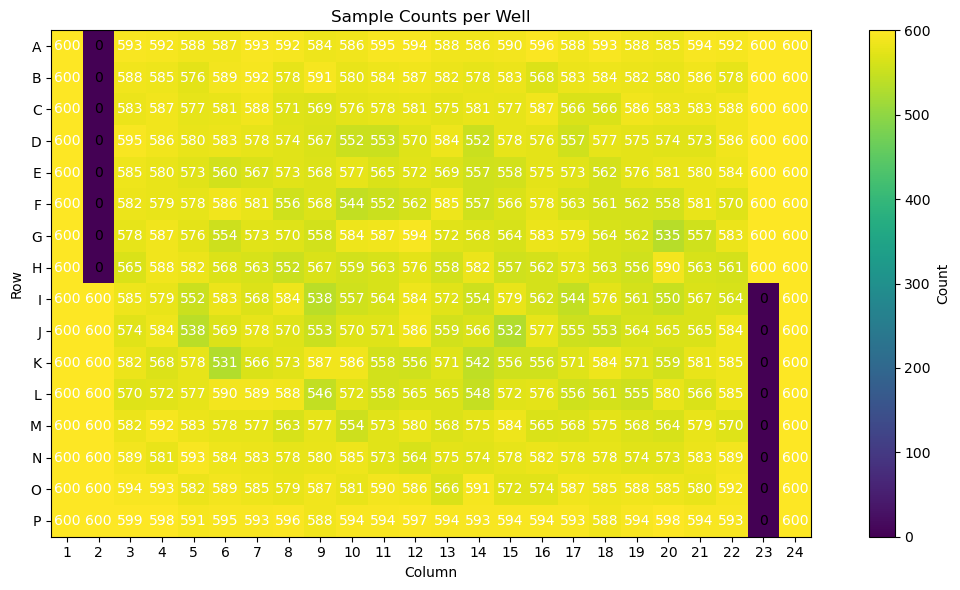

In [46]:
mask_actives_pos_controls = (df_Enamine['is_Active'] == 1) | (df_Enamine['Control_Label'] == 1)

df_Enamine_no_active_pos = df_Enamine.loc[~mask_actives_pos_controls].reset_index(drop=True)

plot_sample_counts_per_well(df_Enamine_no_active_pos)

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


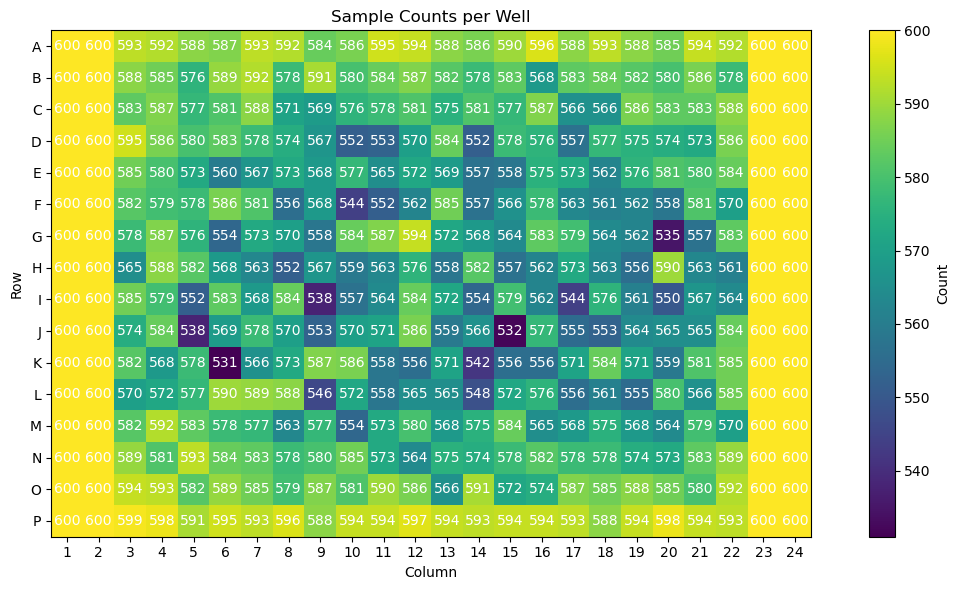

In [47]:
df_Enamine_filled_no_active_pos = augment_specific_columns(df_Enamine_no_active_pos)

plot_sample_counts_per_well(df_Enamine_filled_no_active_pos)


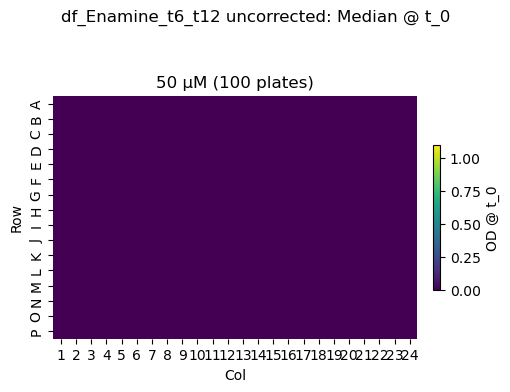

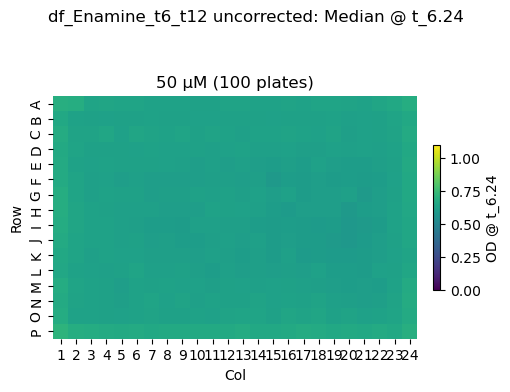

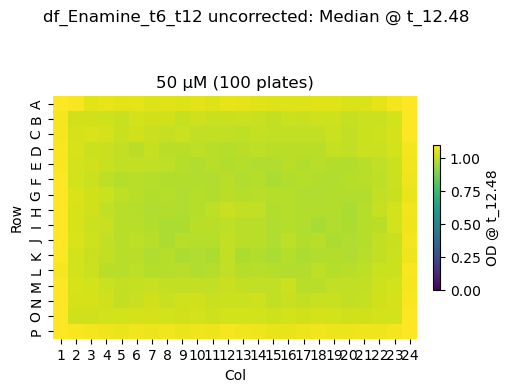

In [48]:

for t in ['t_0','t_6.24','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='uncorrected',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        
    )

Timepoints: ['t_0', 't_6.24', 't_12.48']


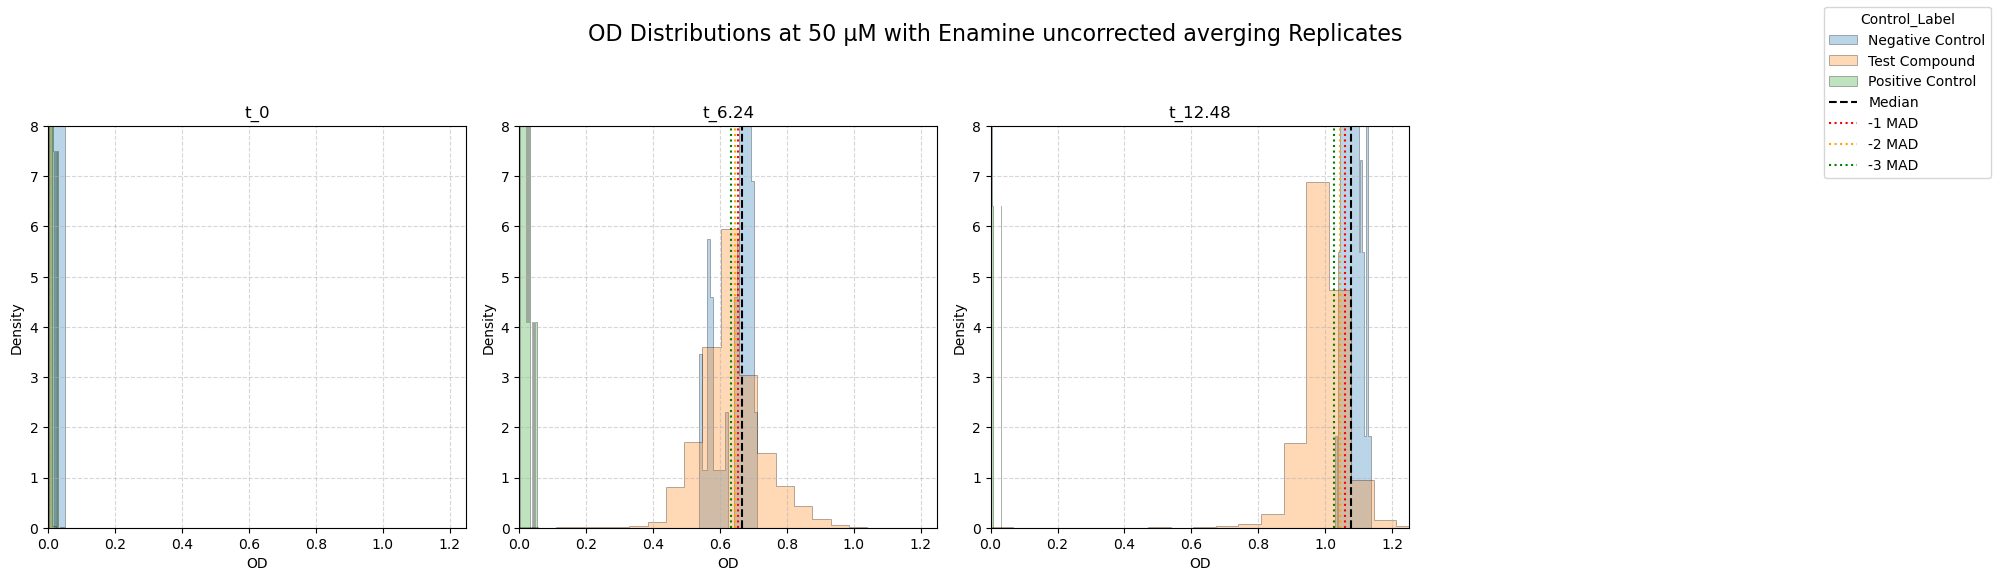

In [49]:
df_Enamine_avg = (
    df_Enamine
      .drop(columns='Replicate')                      # replicate identifer no longer needed
      .groupby(
          ['Plate_ID', 'Concentration',
           'Compound', 'Control_Label', 'Timepoint'],
          as_index=False
      )
      .agg(
          OD        = ('OD', 'mean'),
          Smiles    = ('Smiles', 'first'),
          is_Active = ('is_Active', 'first'),

      )
)


custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Enamine uncorrected averging Replicates'
concentrations=[50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='uncorrected',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_avg,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8,
        save_path=True)

## Well Correction

In [51]:
df_Enamine_well_corrected_time,global_medians,well_medians = correct_well_batch_effect_time(df_Enamine)
df_Enamine_well_corrected_time_conc,global_medians,well_medians = correct_well_batch_effect_time_conc(df_Enamine)



In [52]:
df_Enamine_well_corrected_time[(df_Enamine_well_corrected_time['Control_Label'] == 1) & (df_Enamine_well_corrected_time['Timepoint'] == 't_12.48')]['OD'].isna().sum()

2426

In [53]:
df_Enamine_well_corrected_time.equals(df_Enamine_well_corrected_time_conc)


True

In [54]:
df_Enamine_well_corrected,global_medians,well_medians = correct_well_batch_effect_time(df_Enamine)

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


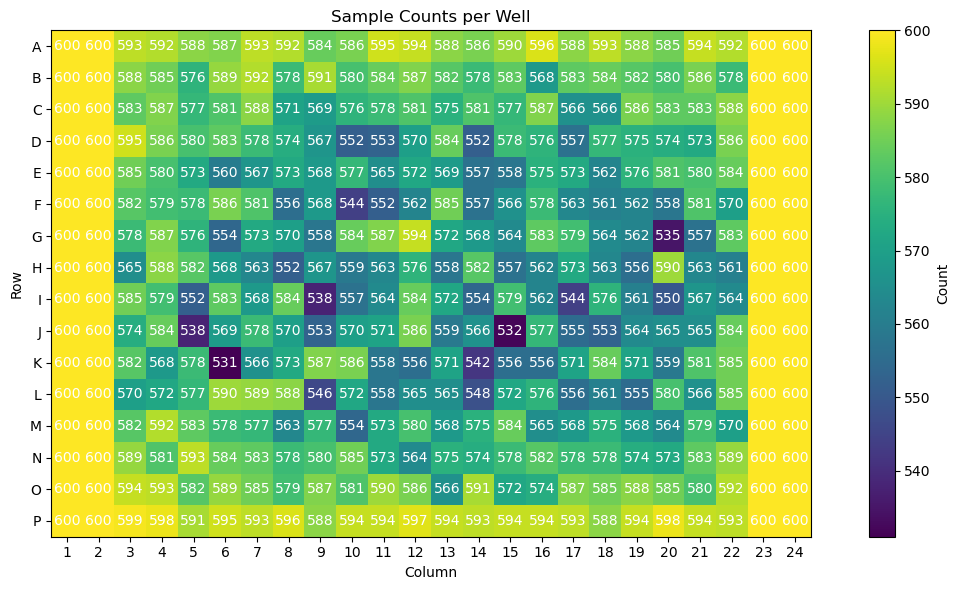

In [55]:
mask_actives_pos_controls = (df_Enamine_well_corrected['is_Active'] == 1) | (df_Enamine_well_corrected['Control_Label'] == 1)

df_Enamine_corrected_no_active_pos = df_Enamine_well_corrected.loc[~mask_actives_pos_controls].reset_index(drop=True)

df_Enamine_well_corrected_filled_no_active_pos = augment_specific_columns(df_Enamine_corrected_no_active_pos)

plot_sample_counts_per_well(df_Enamine_well_corrected_filled_no_active_pos)


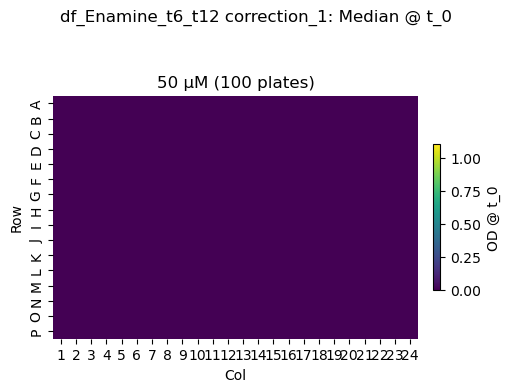

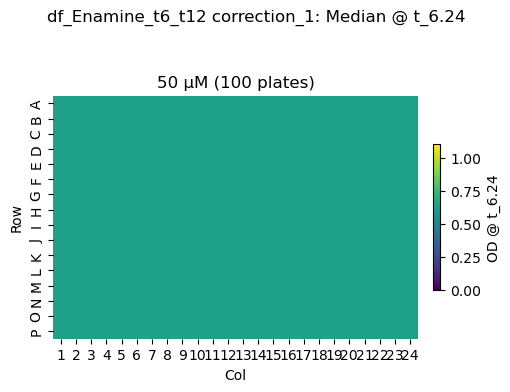

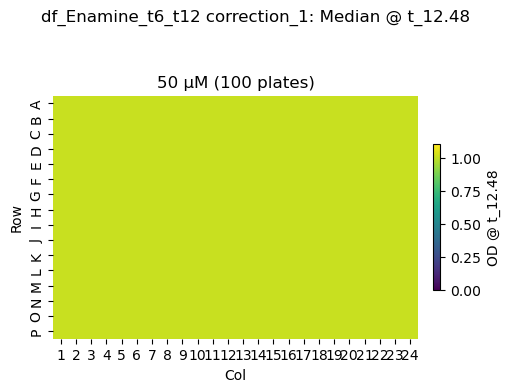

In [56]:

for t in ['t_0','t_6.24','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_1',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_well_corrected_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )

In [57]:

plate_counts = (
    df_Enamine_well_corrected
      .groupby(['Compound', 'Concentration', 'Timepoint'] )['Plate_ID']
      .nunique()           
)
plate_counts_no_ctrl = plate_counts.loc[
    ~plate_counts.index.get_level_values('Compound').isin(['DMSO', 'Ciprofloxacin']  )
]

mixed_plate_groups = plate_counts_no_ctrl[plate_counts_no_ctrl > 1]

if mixed_plate_groups.empty:
    print("✅  All replicates for every compound/time-point are on the same plate.")
else:
    print("⚠️  Some replicate sets span multiple plates:")
    display(mixed_plate_groups)

✅  All replicates for every compound/time-point are on the same plate.


In [58]:
df_Enamine_well_corrected_avg = (
    df_Enamine_well_corrected
      .drop(columns='Replicate')                      # replicate identifer no longer needed
      .groupby(
          ['Plate_ID', 'Concentration',
           'Compound', 'Control_Label', 'Timepoint'],
          as_index=False
      )
      .agg(
          OD        = ('OD', 'mean'),
          Smiles    = ('Smiles', 'first'),
          is_Active = ('is_Active', 'first'),

      )
)
df_Enamine_well_corrected_avg


Plate_ID  Concentration       Compound  Control_Label  \
0      1886318-Y12-A001             50  Ciprofloxacin              1   
1      1886318-Y12-A001             50  Ciprofloxacin              1   
2      1886318-Y12-A001             50  Ciprofloxacin              1   
3      1886318-Y12-A001             50           DMSO             -1   
4      1886318-Y12-A001             50           DMSO             -1   
...                 ...            ...            ...            ...   
96595  1886318-Y12-A100             50     Z963407962              0   
96596  1886318-Y12-A100             50     Z963407962              0   
96597  1886318-Y12-A100             50     Z994483036              0   
96598  1886318-Y12-A100             50     Z994483036              0   
96599  1886318-Y12-A100             50     Z994483036              0   

      Timepoint        OD                                        Smiles  \
0           t_0  0.010702  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
1       t_12.48       NaN  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
2        t_6.24  1.070048  1CNCCN1c(c2)c(F)cc3c2N(C4CC4)C=C(C3=O)C(=O)O   
3           t_0  0.000000                                          None   
4       t_12.48  0.984288                                          None   
...         ...       ...                                           ...   
96595   t_12.48  0.975825              NCC1CCN(C1)C(=O)C=2C=CC=3OCCC3C2   
96596    t_6.24  0.548262              NCC1CCN(C1)C(=O)C=2C=CC=3OCCC3C2   
96597       t_0  0.000000               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   
96598   t_12.48  1.020788               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   
96599    t_6.24  0.555445               NCC1CCN(C1)C(=O)C=2C=CC=C(F)C2F   

       is_Active  
0              0  
1              1  
2              1  
3              0  
4              0  
...          ...  
96595          1  
96596          0  
96597          0  
96598          0  
96599          0  

[96600 rows x 8 columns]

In [59]:
print(df_Enamine_well_corrected_avg['is_Active'].sum())
df_Enamine_well_corrected_avg[df_Enamine_well_corrected_avg['Compound'] == 'Z27542156']

4134


Plate_ID  Concentration   Compound  Control_Label Timepoint  \
570  1886318-Y12-A001             50  Z27542156              0       t_0   
571  1886318-Y12-A001             50  Z27542156              0   t_12.48   
572  1886318-Y12-A001             50  Z27542156              0    t_6.24   

           OD                                           Smiles  is_Active  
570  0.000000  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          0  
571  0.738166  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          1  
572  0.307276  [O-][N+](=O)C1=CC=C(S1)C(=O)NCC=2C=CC=3OCCOC3C2          1

Timepoints: ['t_0', 't_6.24', 't_12.48']


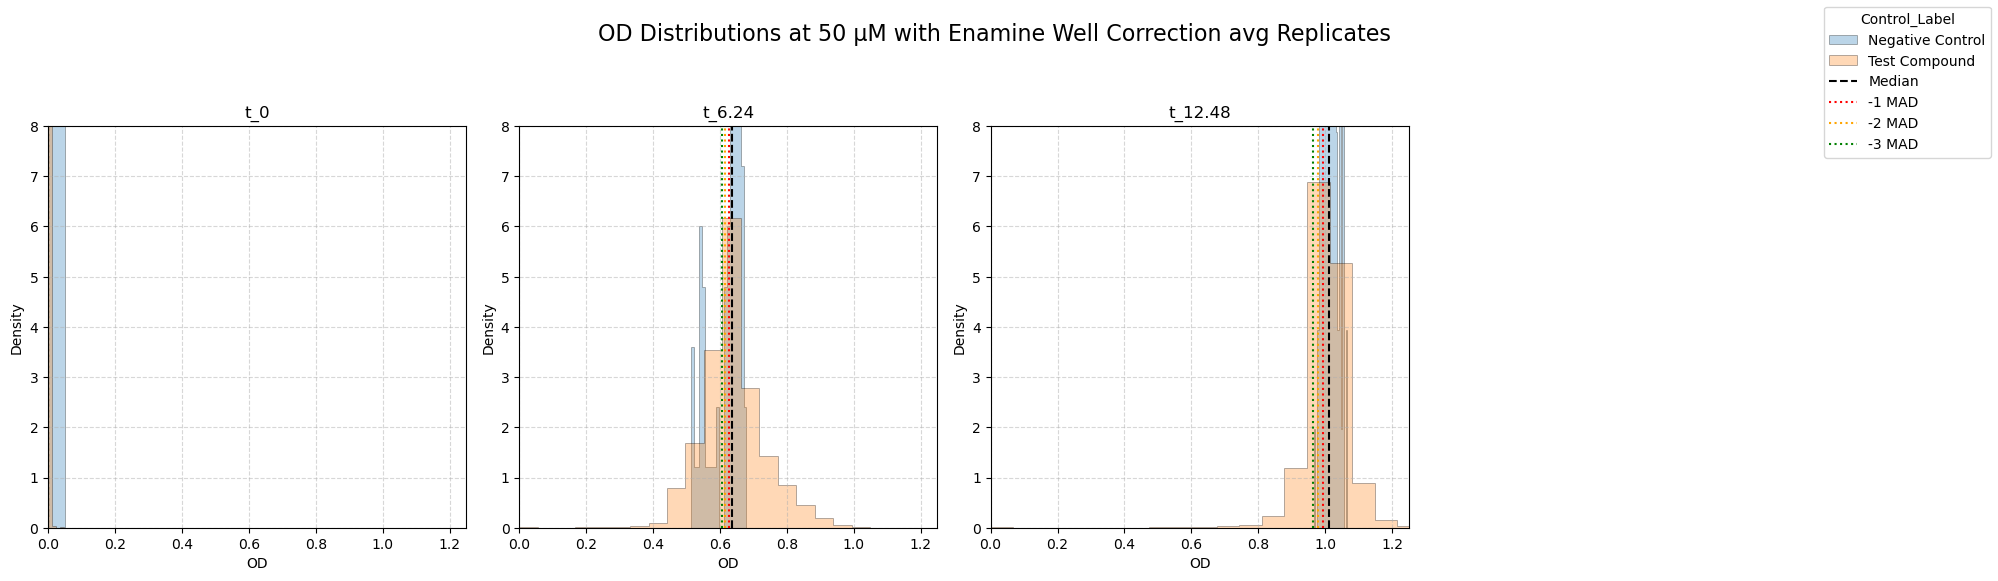

In [60]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Enamine Well Correction avg Replicates'
concentrations=[50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_1',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_well_corrected_avg,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8,
        plot_pos_ctrls=False,
        save_path=True
    )

## Well + Plate correction

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


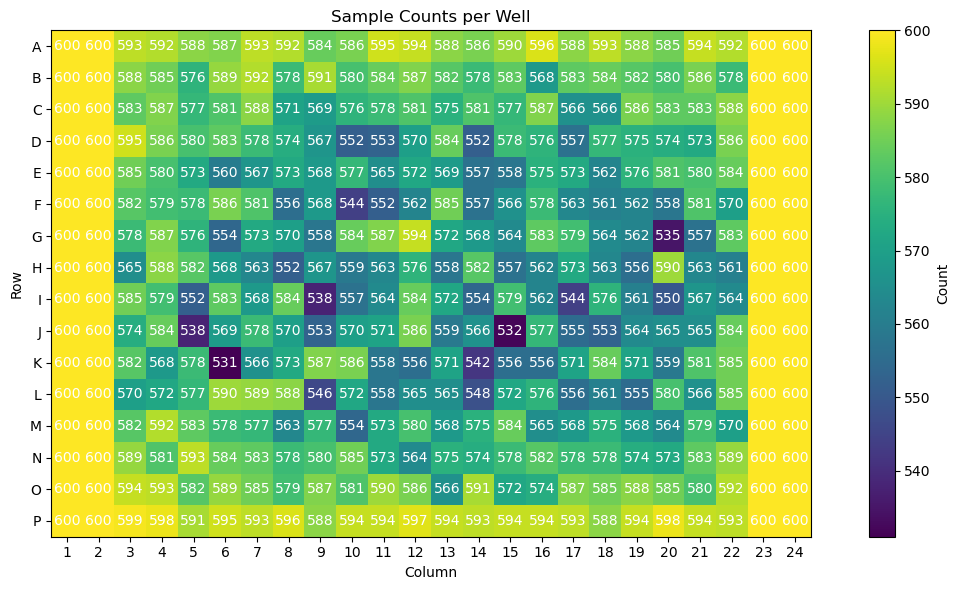

In [62]:
df_Enamine_plate_well_corrected = correct_plate_batch_effect(df_Enamine_well_corrected)

df_Enamine_plate_well_corrected_pos_controls = (df_Enamine_plate_well_corrected['is_Active'] == 1) | (df_Enamine_plate_well_corrected['Control_Label'] == 1)

df_Enamine_plate_well_corrected_no_active_pos = df_Enamine_plate_well_corrected.loc[~mask_actives_pos_controls].reset_index(drop=True)

df_Enamine_plate_well_corrected_filled_no_active_pos = augment_specific_columns(df_Enamine_plate_well_corrected_no_active_pos)

plot_sample_counts_per_well(df_Enamine_plate_well_corrected_filled_no_active_pos)


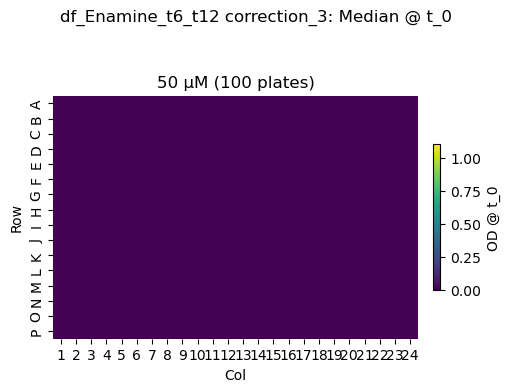

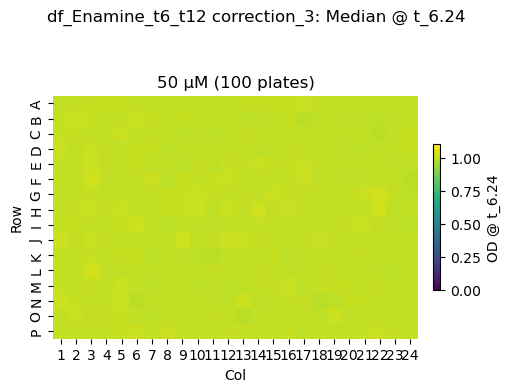

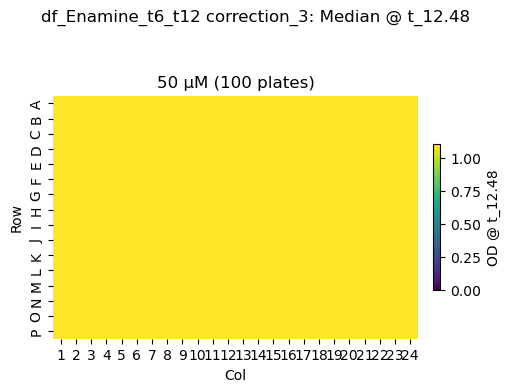

In [63]:
for t in ['t_0','t_6.24','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='correction_3',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_plate_well_corrected_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )

In [65]:
df_Enamine_plate_well_corrected_avg = (
    df_Enamine_plate_well_corrected
      .drop(columns='Replicate')                      # replicate identifer no longer needed
      .groupby(
          ['Plate_ID', 'Concentration',
           'Compound', 'Control_Label', 'Timepoint'],
          as_index=False
      )
      .agg(
          OD        = ('OD', 'mean'),
          Smiles    = ('Smiles', 'first'),
          is_Active = ('is_Active', 'first'),

      )
)

Timepoints: ['t_0', 't_6.24', 't_12.48']


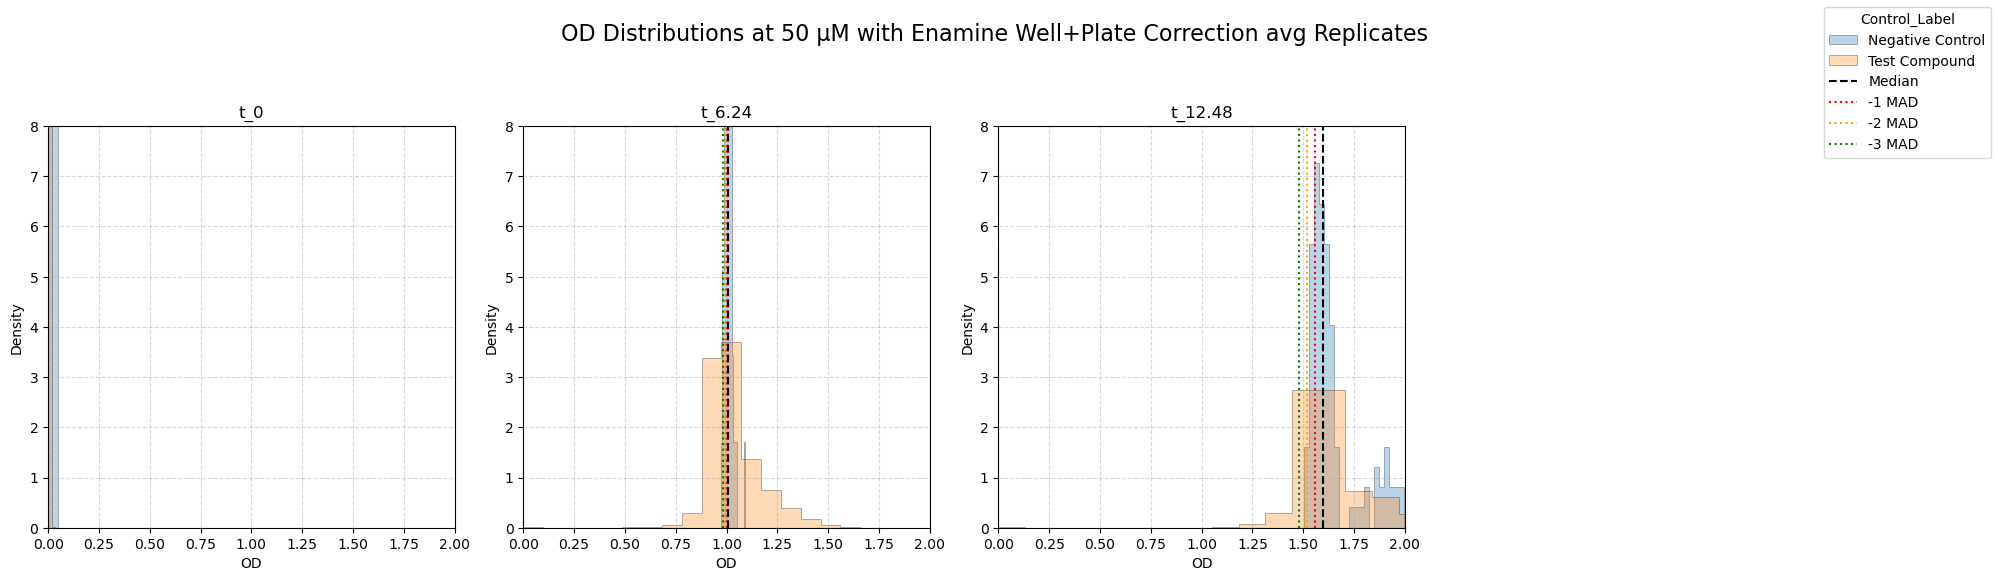

In [66]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Enamine Well+Plate Correction avg Replicates'
concentrations=[50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='correction_3',
        dataset='df_Enamine_t6_t12',
        df_long=df_Enamine_plate_well_corrected_avg,
        concentration=c,
        bins=custom_bins, 
        max_x=2,
        max_density=8,
        plot_pos_ctrls=False,
        save_path=True)

# Combine Well Correction

In [67]:
df_well_correction = pd.concat([df_GrowthCurve_well_corrected_time_conc,df_Enamine_well_corrected_avg], ignore_index=True)

df_well_plate_correction = pd.concat([df_GrowthCurve_plate_well_corrected_time_conc,df_Enamine_plate_well_corrected_avg], ignore_index=True)

In [68]:
print(df_well_correction.shape,df_well_plate_correction.shape)


(225624, 11) (225624, 11)


In [69]:
df_GrowthCurve_well_corrected_time_conc['Timepoint'].value_counts()

t_0        18432
t_2.08     18432
t_4.16     18432
t_6.24     18432
t_8.32     18432
t_10.4     18432
t_12.48    18432
Name: Timepoint, dtype: int64

In [169]:
df_Enamine_well_corrected_avg['Timepoint'].value_counts()

t_0        32200
t_12.48    32200
t_6.24     32200
Name: Timepoint, dtype: int64

In [170]:
df_well_correction['Timepoint'].value_counts()

t_0        50632
t_6.24     50632
t_12.48    50632
t_2.08     18432
t_4.16     18432
t_8.32     18432
t_10.4     18432
Name: Timepoint, dtype: int64

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


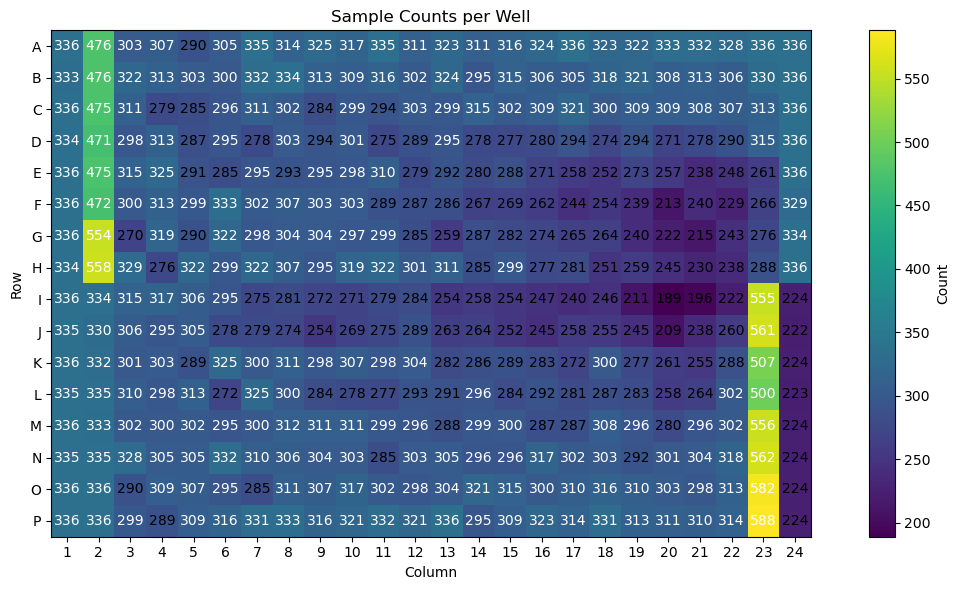

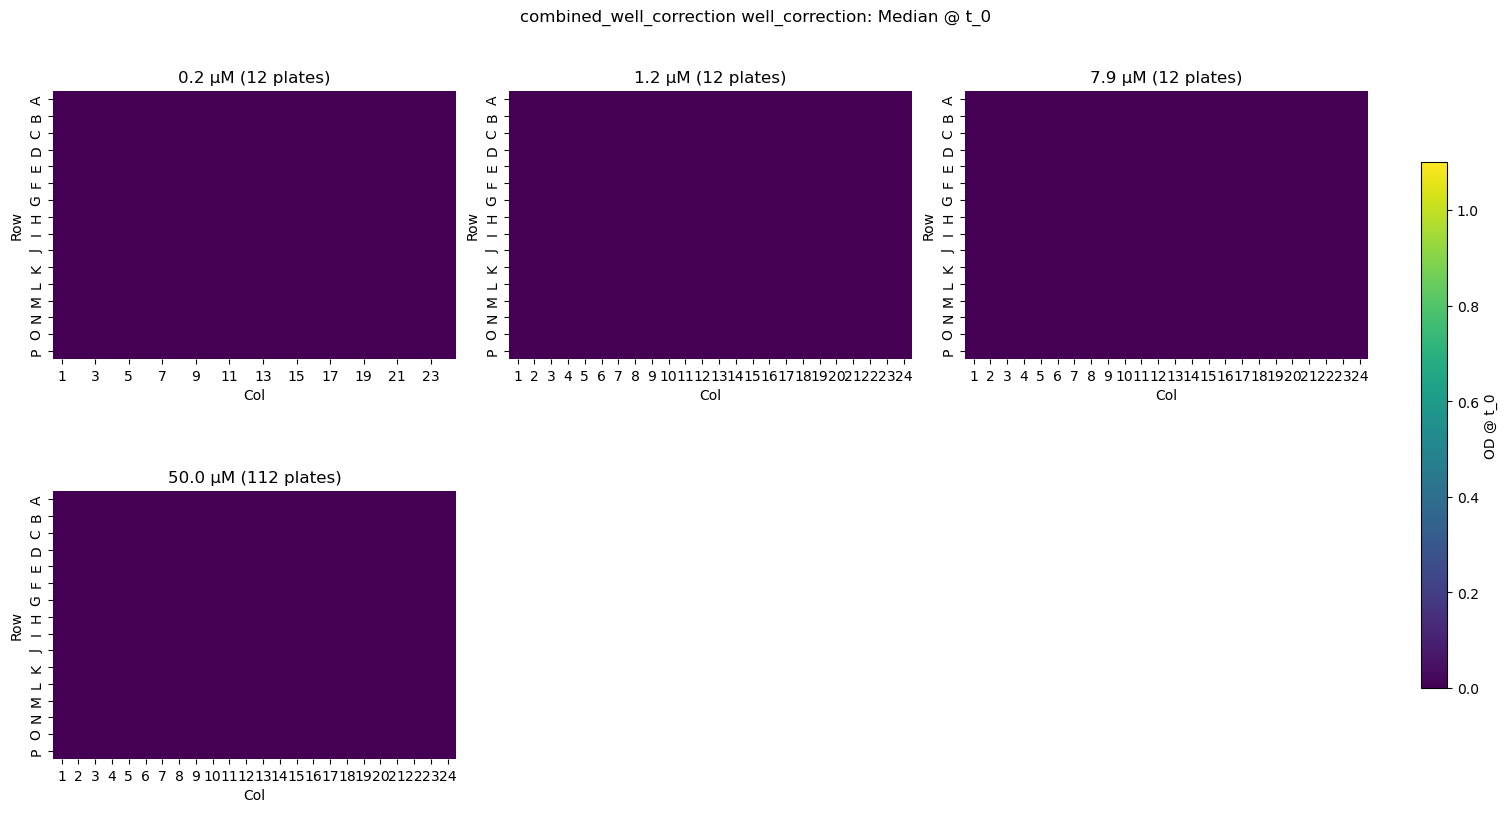

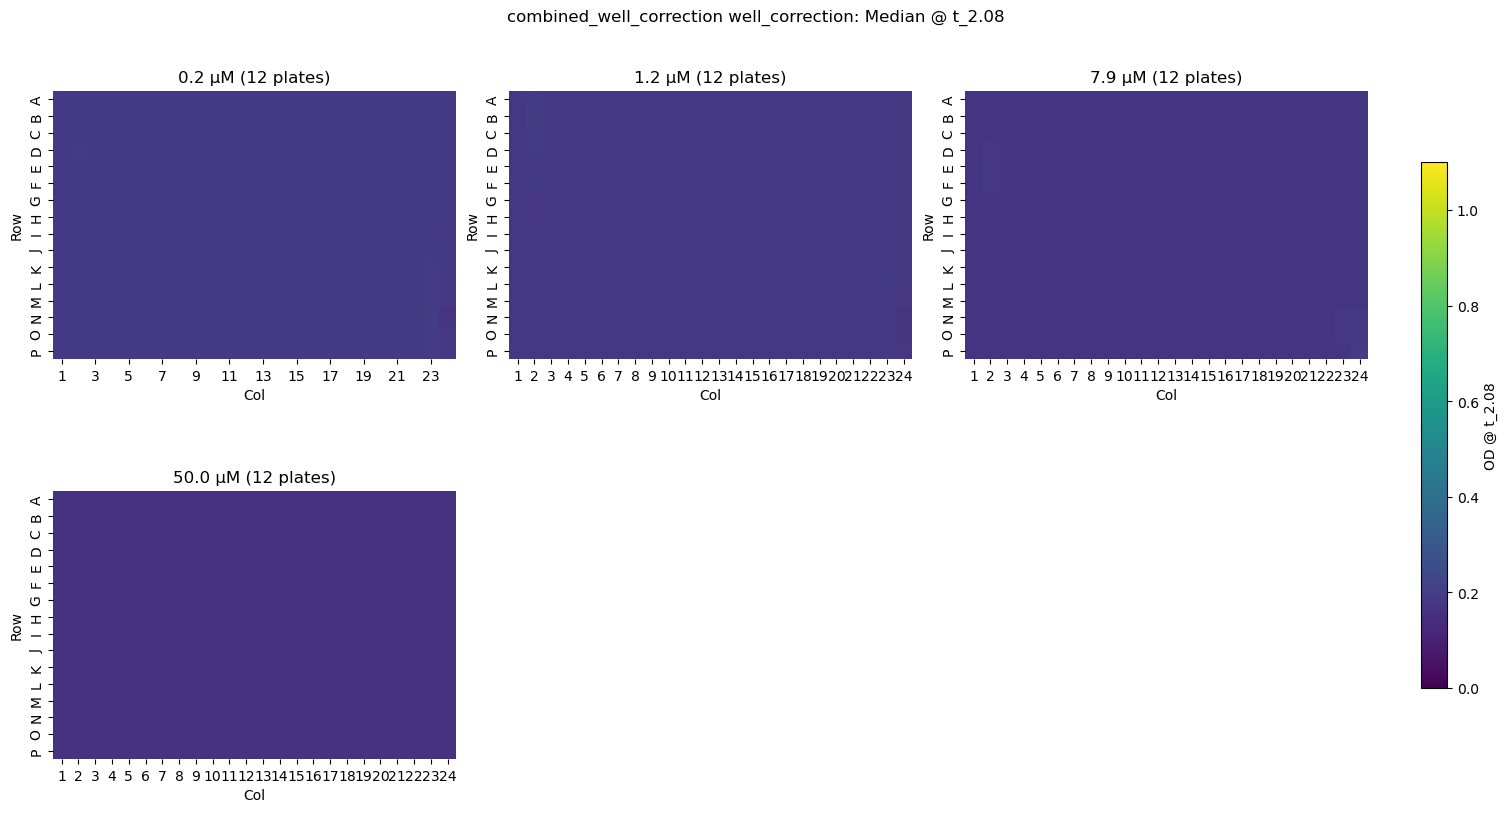

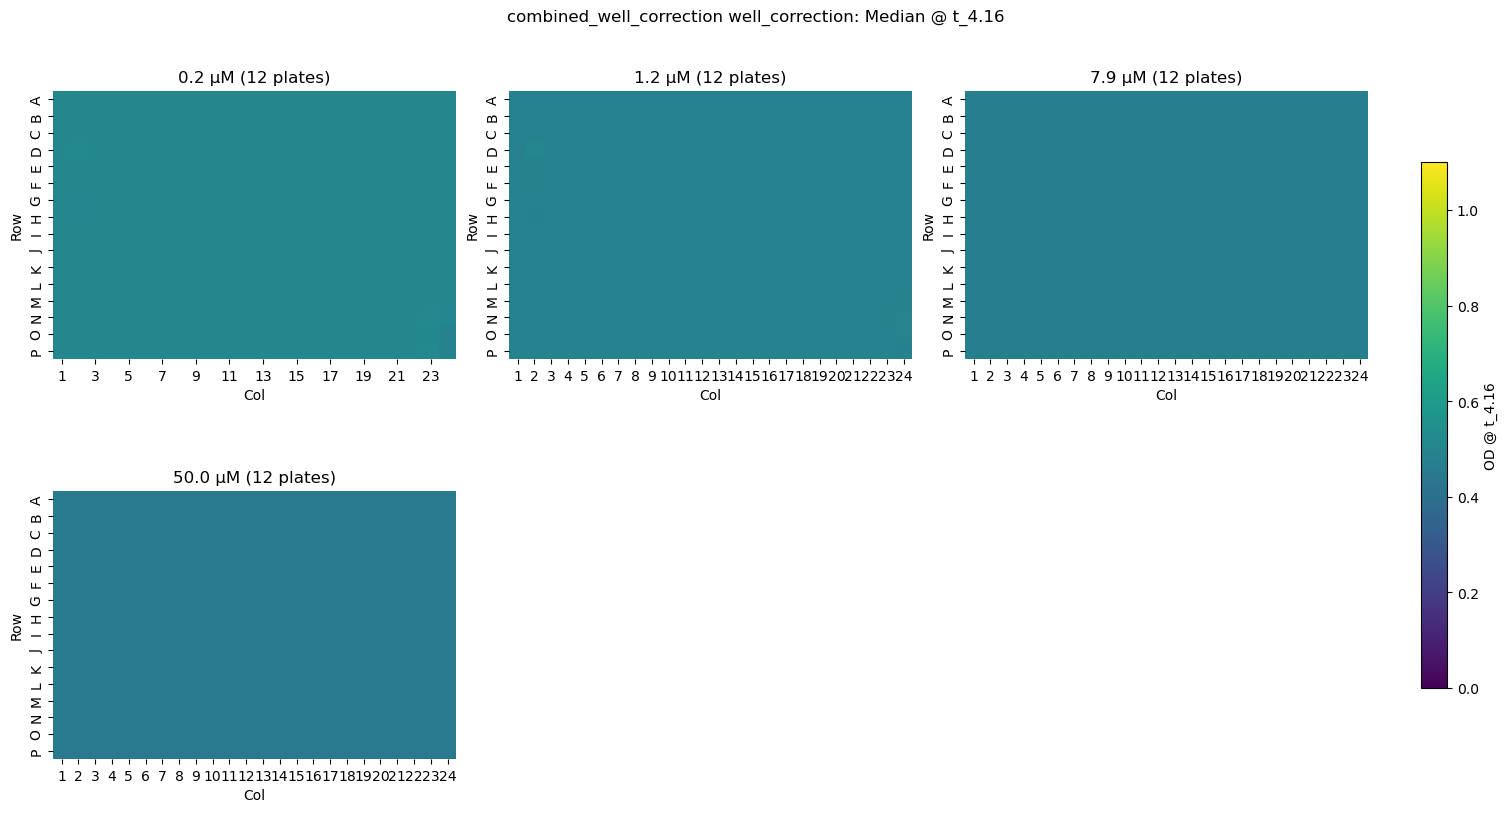

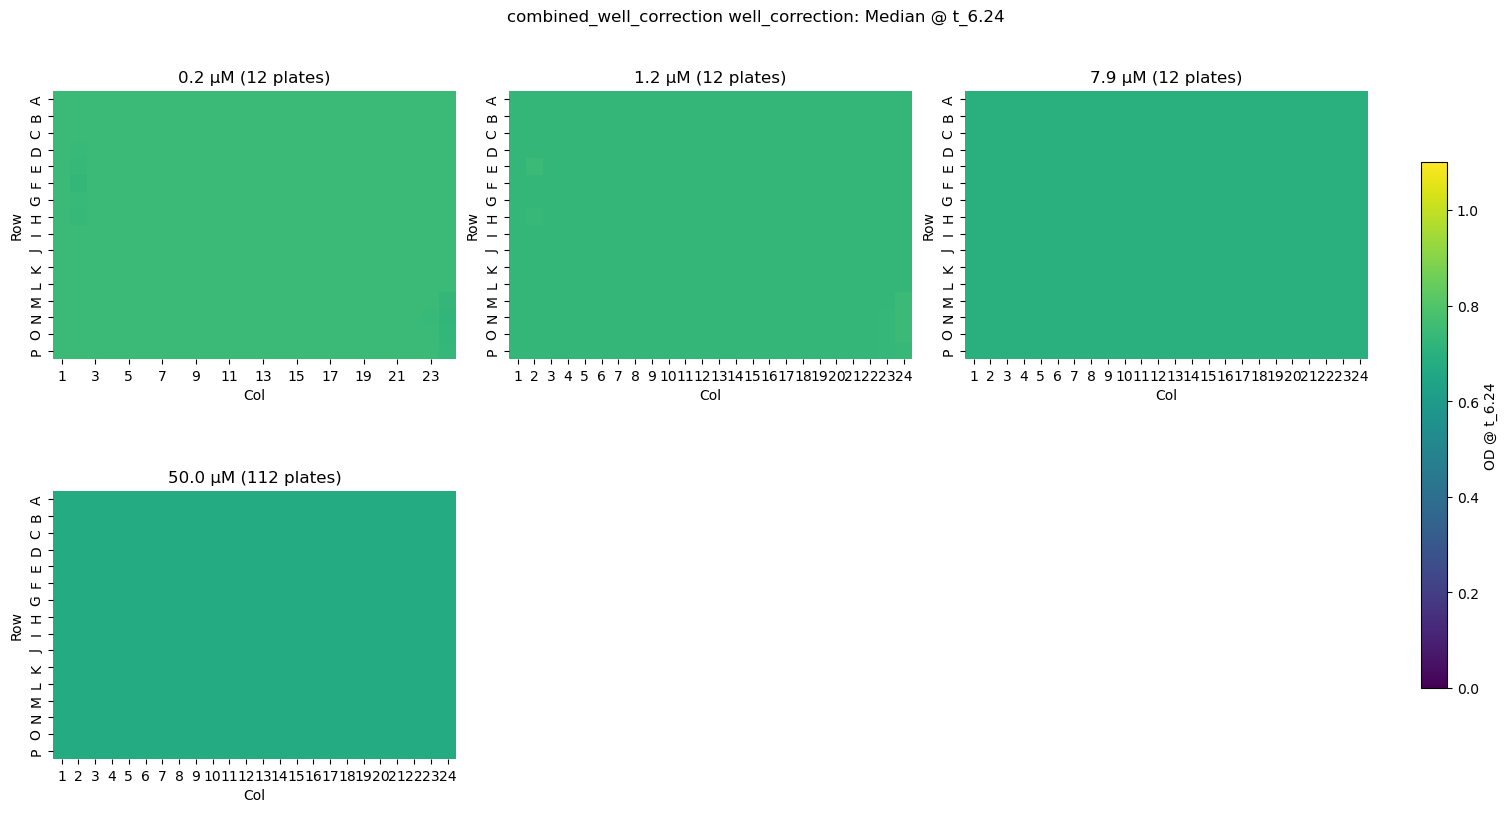

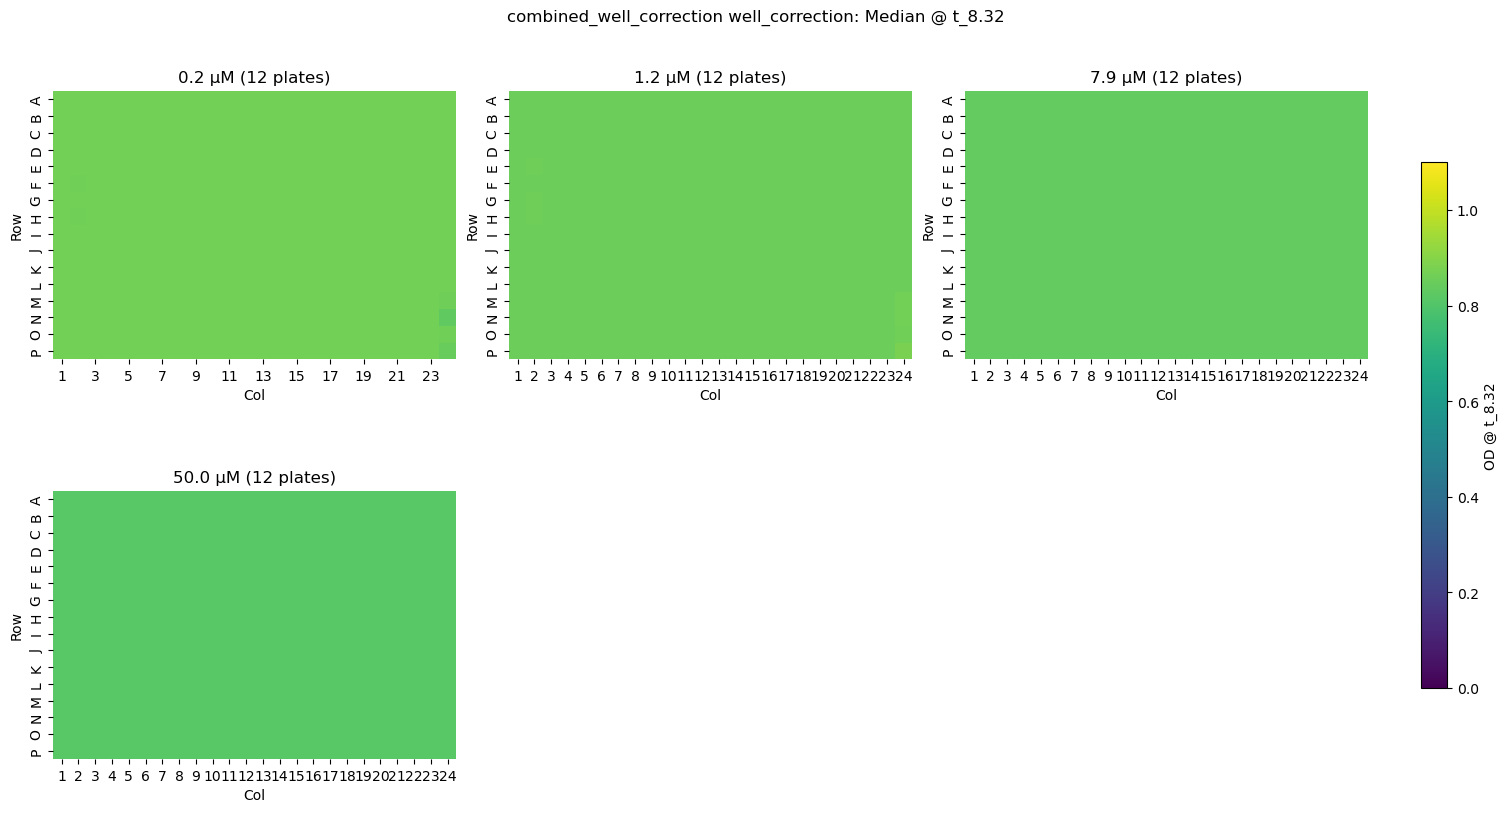

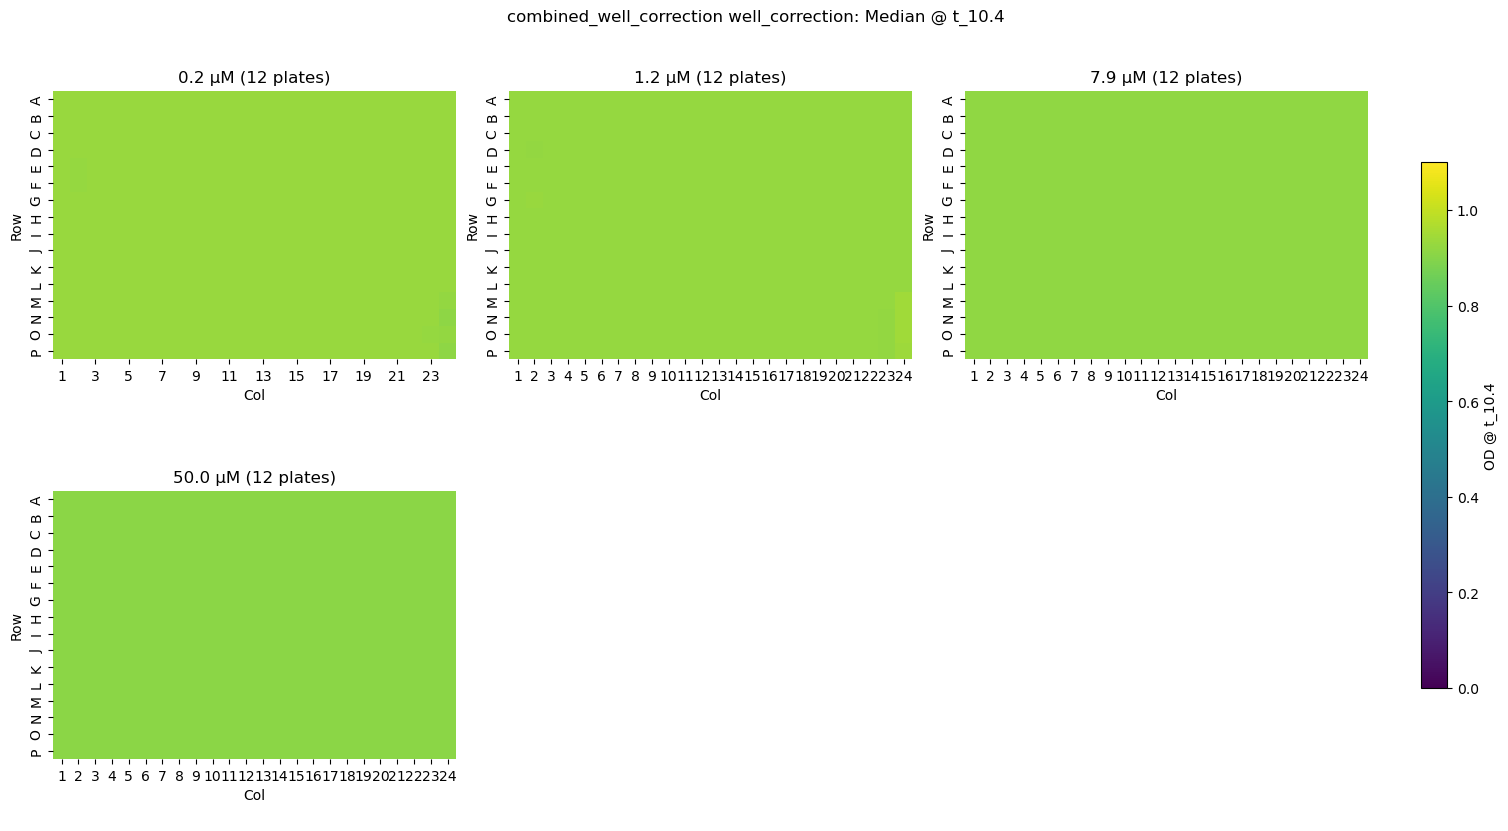

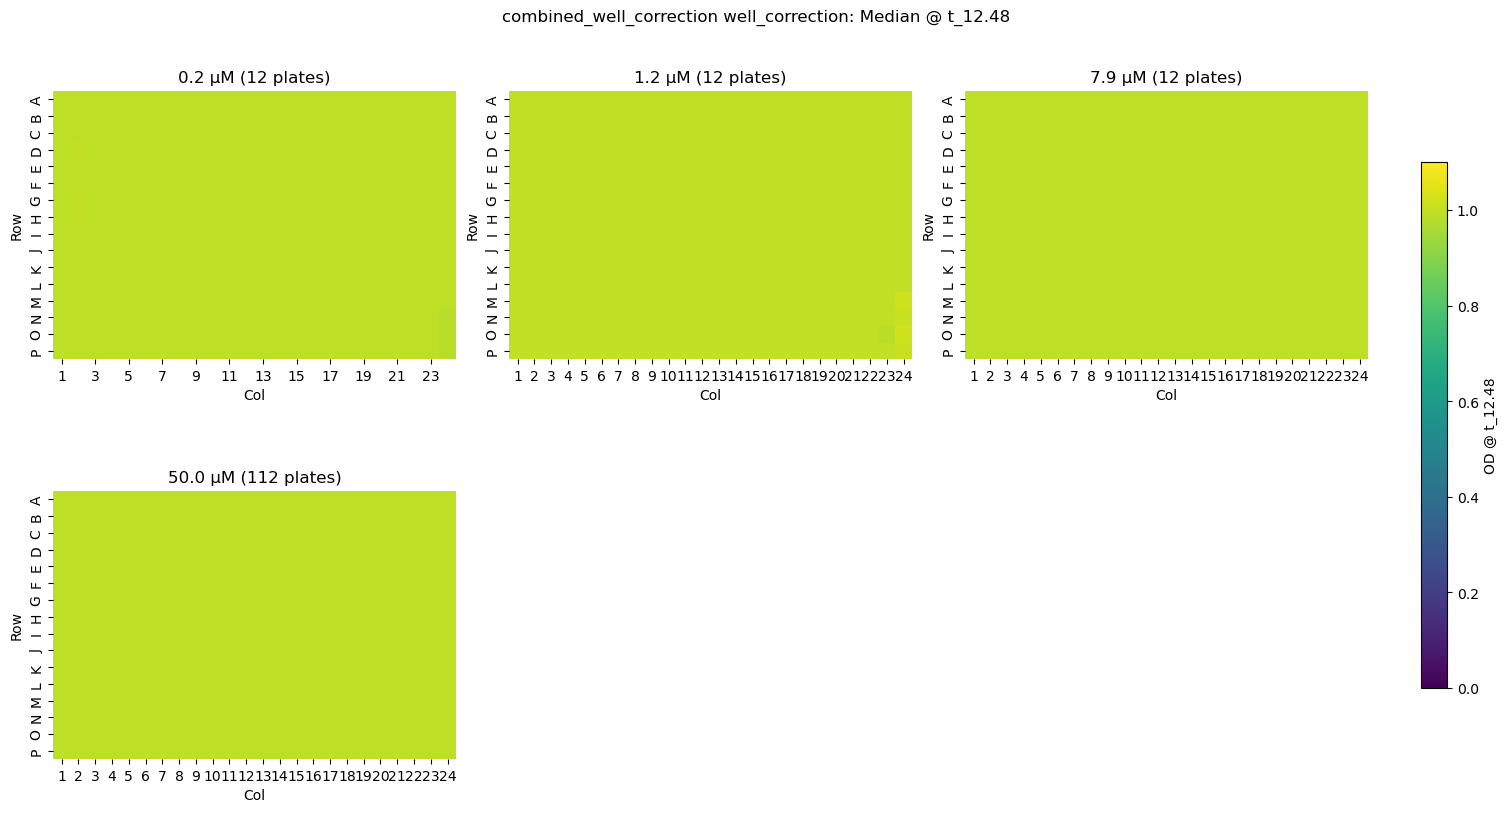

In [70]:
mask_actives_pos_controls = (df_well_correction['is_Active'] == 1) | (df_well_correction['Control_Label'] == 1)

df_well_correction_no_active_pos = df_well_correction.loc[~mask_actives_pos_controls].reset_index(drop=True)

df_well_correction_filled_no_active_pos = augment_specific_columns(df_well_correction_no_active_pos)

plot_sample_counts_per_well(df_well_correction_filled_no_active_pos)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='well_correction',
        dataset='combined_well_correction',
        df_long=df_well_correction_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.10,
        save_path=True
    )


Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']


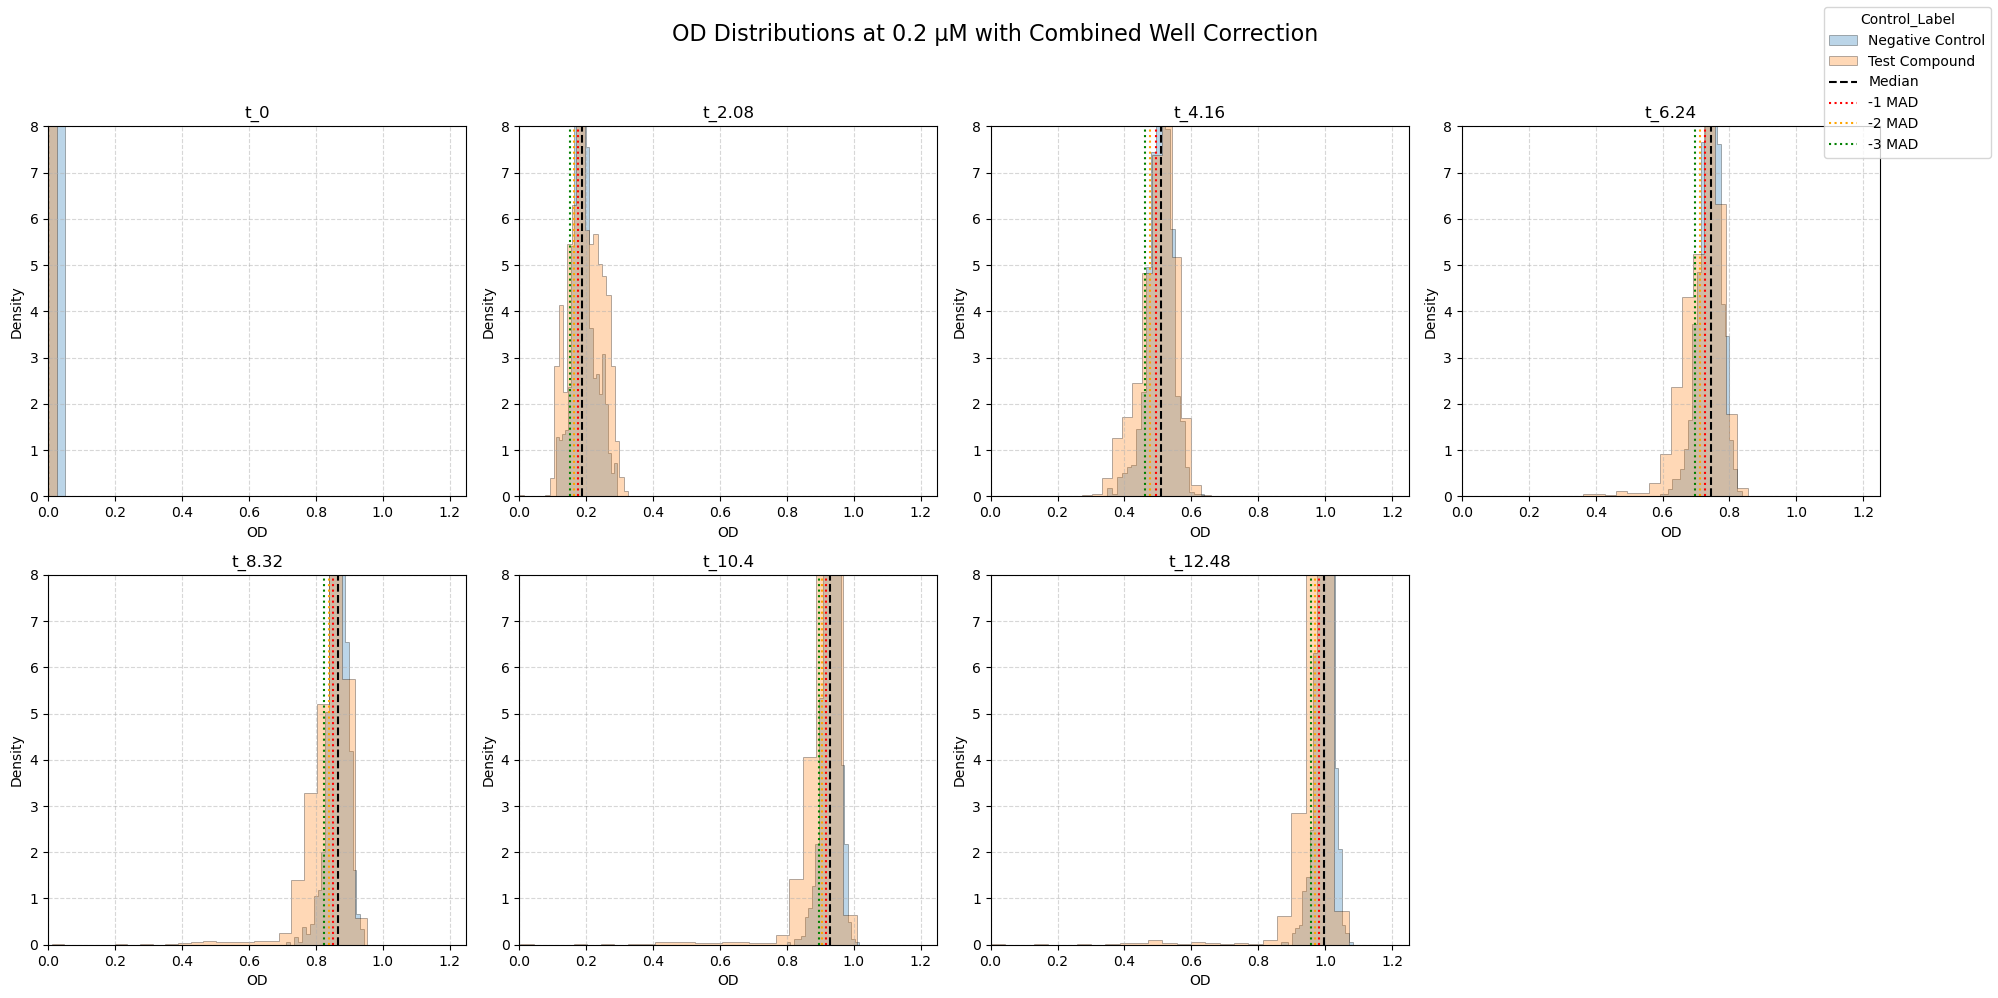

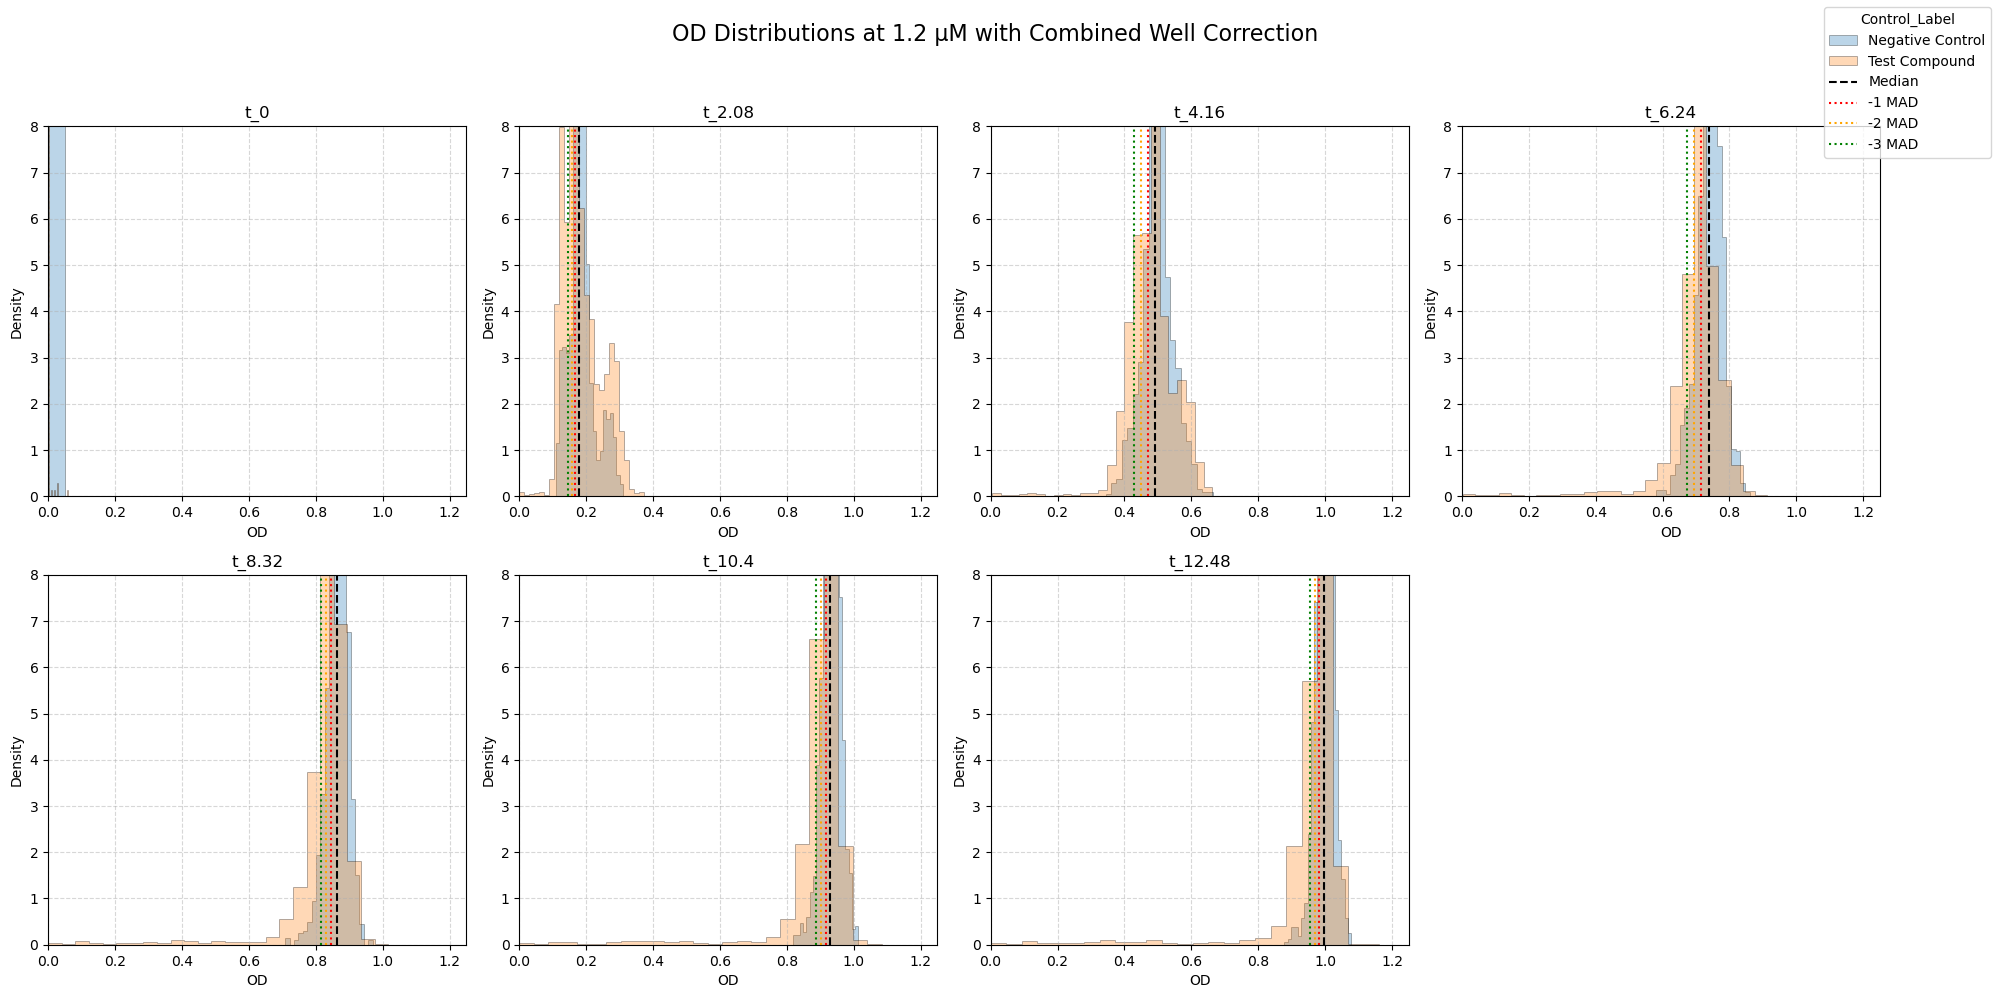

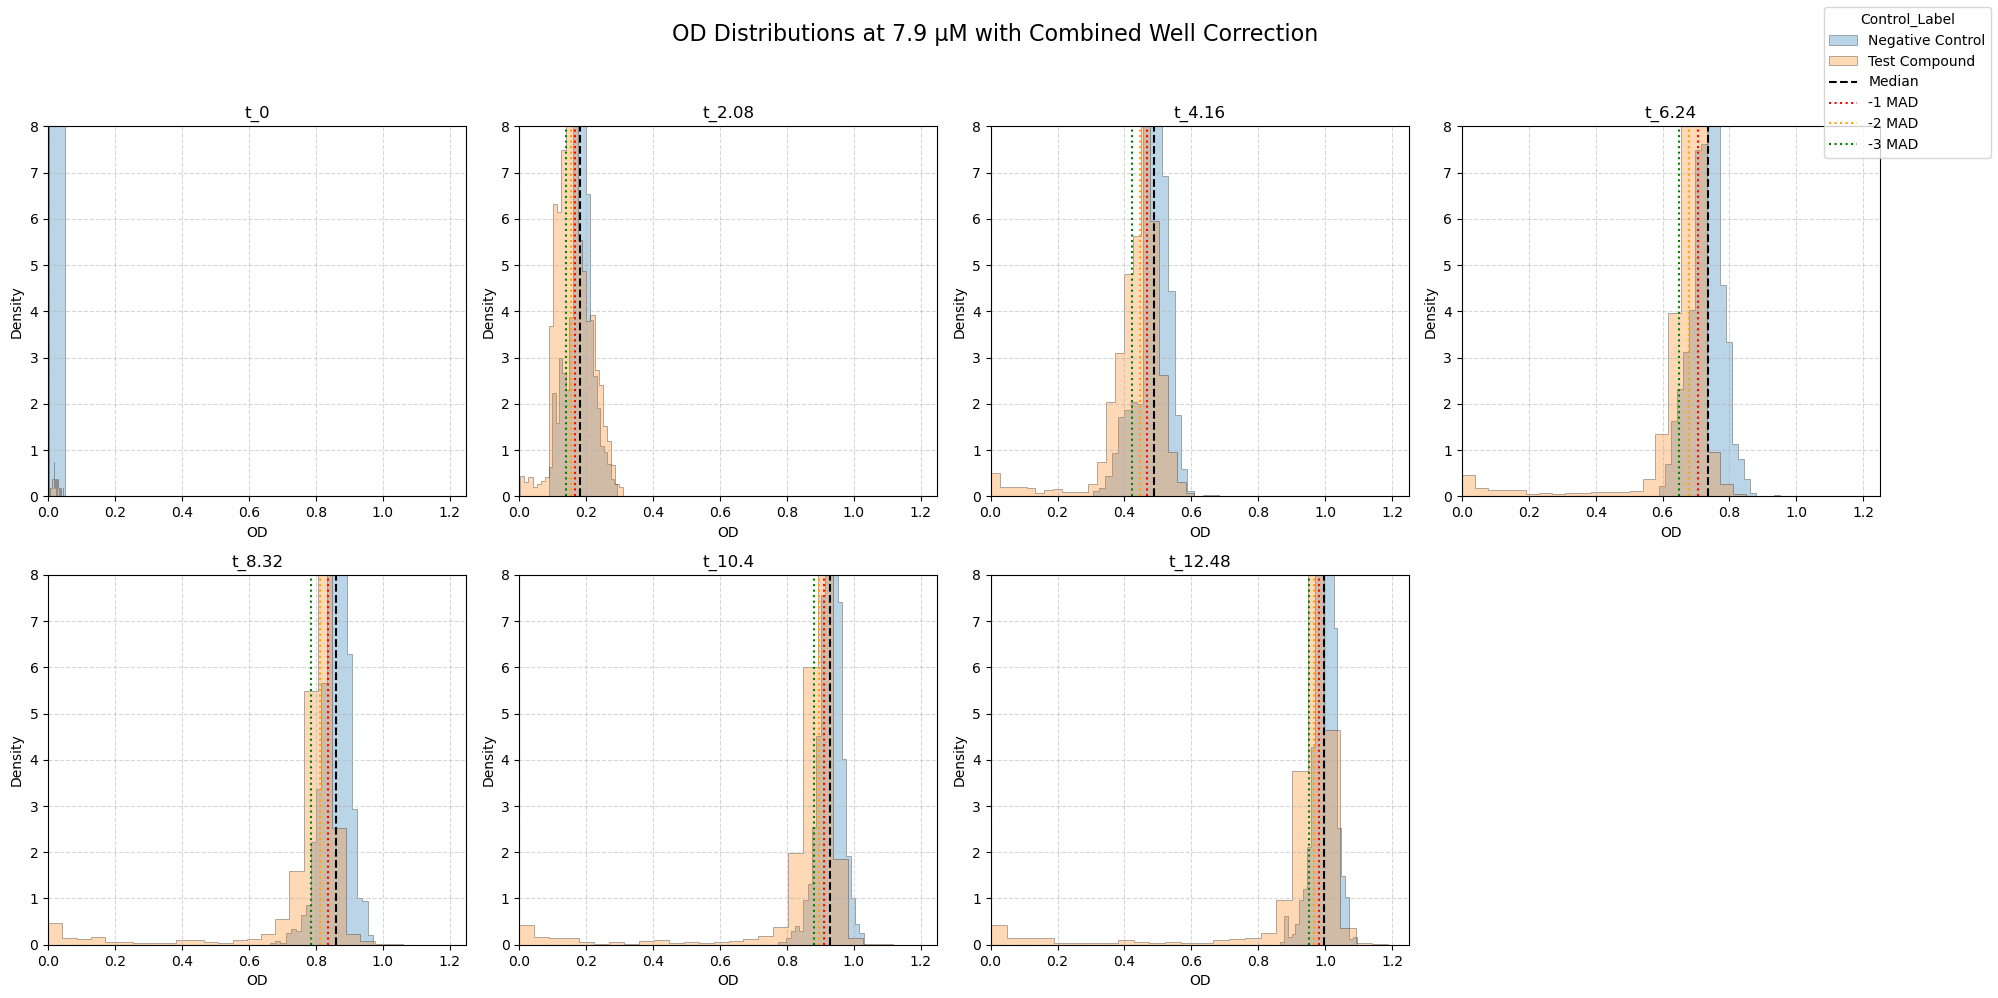

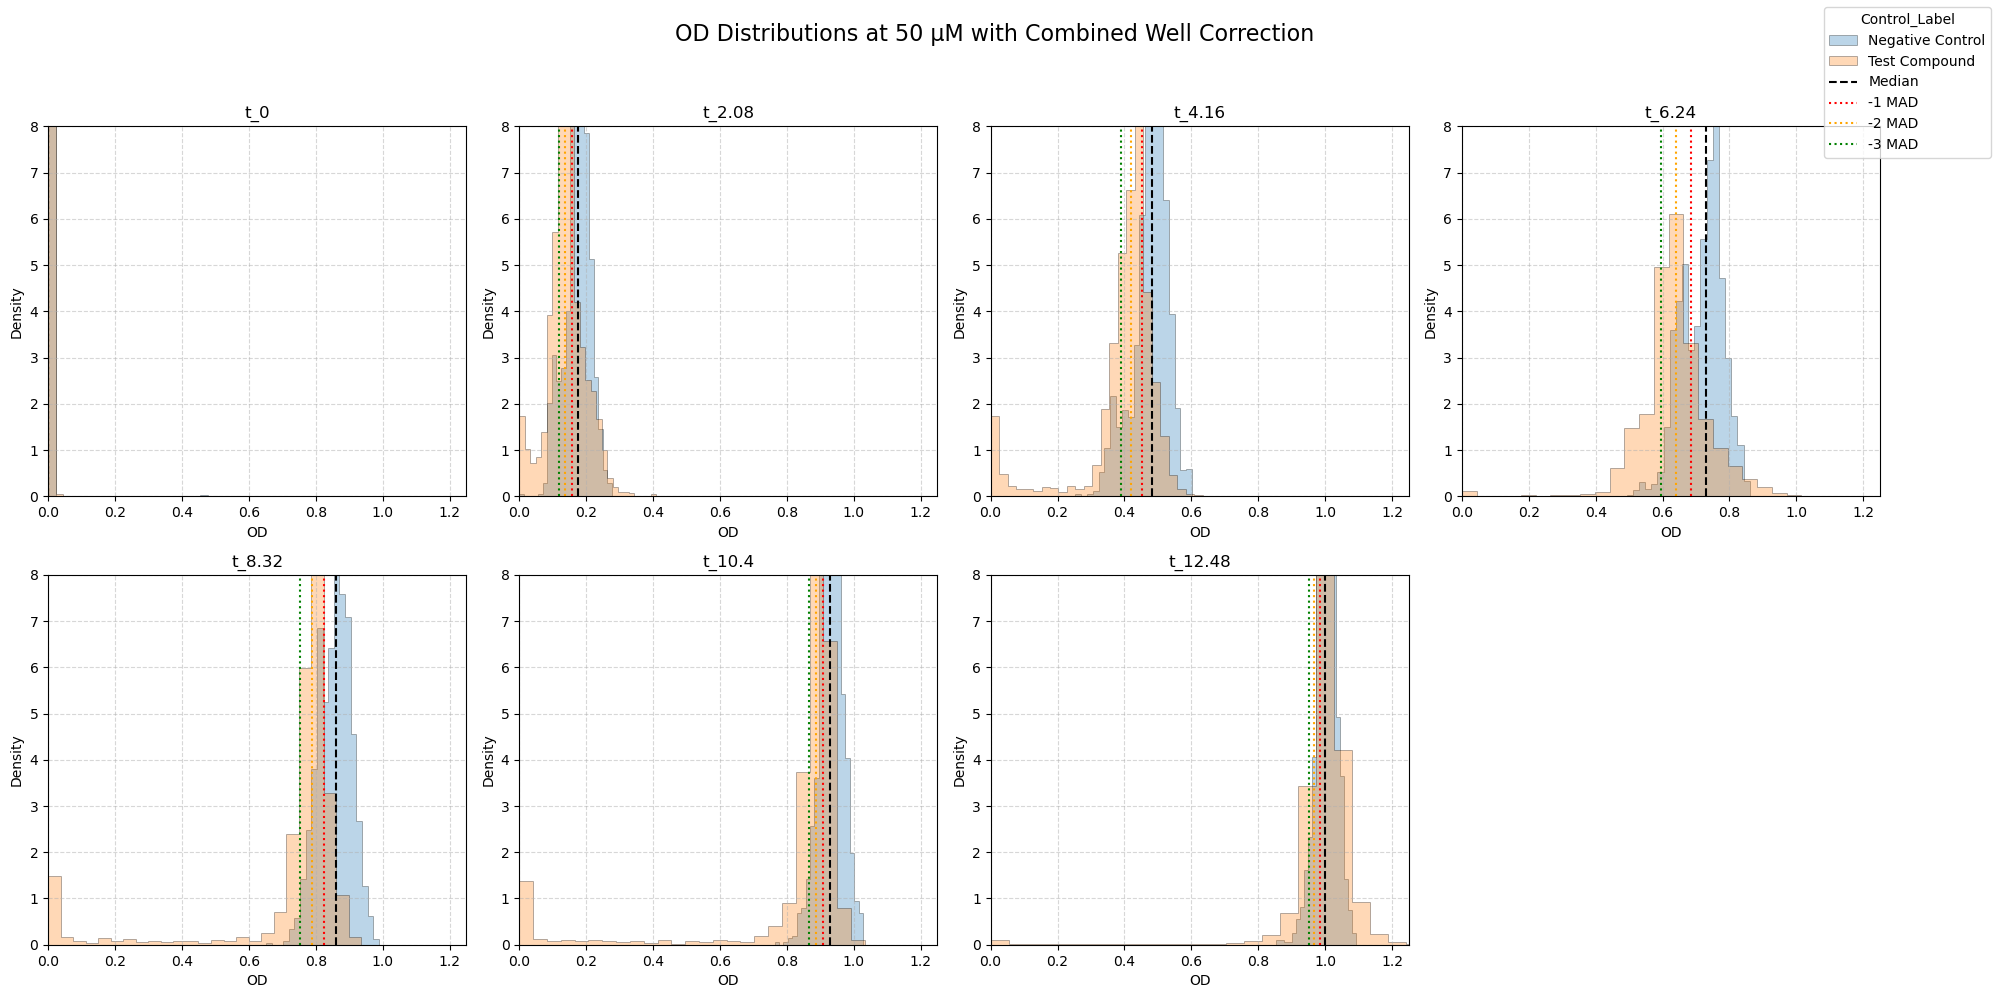

In [71]:
custom_bins = {
    -1: 20,                       # negatives
     0: 25,  # tests
     1: 20,                     # positives
}

title='Combined Well Correction'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='well_correction',
        dataset='combined_well_correction',
        df_long=df_well_correction,
        concentration=c,
        bins=custom_bins, 
        max_x=1.25,
        max_density=8,
        plot_pos_ctrls=False,
        save_path=True)

## Sanity Check

In [266]:
df_well_correction = pd.concat([df_GrowthCurve_well_corrected_time_conc,df_Enamine_well_corrected_avg], ignore_index=True)

filtered = (
    df_well_correction
        .loc[
            (df_well_correction['Timepoint'] == 't_12.48') &
            (df_well_correction['Concentration'] == 50)   &
            (df_well_correction['OD'] < 0.4) &
            (df_well_correction['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)
print(pd.DataFrame(filtered)[['Plate_ID','Compound','OD']].shape)

filtered = (
    df_GrowthCurve_well_corrected_time_conc
        .loc[
            (df_GrowthCurve_well_corrected_time_conc['Timepoint'] == 't_12.48') &
            (df_GrowthCurve_well_corrected_time_conc['Concentration'] == 50)   &
            (df_GrowthCurve_well_corrected_time_conc['OD'] < 0.4) &
            (df_GrowthCurve_well_corrected_time_conc['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)

print(pd.DataFrame(filtered)[['Plate_ID','Compound','OD','is_Active']].shape)

filtered = (
    df_Enamine_well_corrected_avg
        .loc[
            (df_Enamine_well_corrected_avg['Timepoint'] == 't_12.48') &
            (df_Enamine_well_corrected_avg['Concentration'] == 50)   &
            (df_Enamine_well_corrected_avg['OD'] < 0.4) &
            (df_Enamine_well_corrected_avg['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)

print(pd.DataFrame(filtered)[['Plate_ID','Compound','OD','is_Active']].shape)

(94, 3)
(70, 4)
(24, 4)


In [267]:
df_well_correction = pd.concat([df_GrowthCurve_well_corrected_time_conc,df_Enamine_well_corrected_avg], ignore_index=True)

filtered = (
    df_well_correction
        .loc[
            (df_well_correction['Timepoint'] == 't_6.24') &
            (df_well_correction['Concentration'] == 50)   &
            (df_well_correction['OD'] < 0.4) &
            (df_well_correction['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)
print(pd.DataFrame(filtered)[['Plate_ID','Compound','OD']].shape)

filtered_Growthcurve = (
    df_GrowthCurve_well_corrected_time_conc
        .loc[
            (df_GrowthCurve_well_corrected_time_conc['Timepoint'] == 't_6.24') &
            (df_GrowthCurve_well_corrected_time_conc['Concentration'] == 50)   &
            (df_GrowthCurve_well_corrected_time_conc['OD'] < 0.4) &
            (df_GrowthCurve_well_corrected_time_conc['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)

print(pd.DataFrame(filtered_Growthcurve)[['Plate_ID','Compound','OD','is_Active']].shape)

filtered_Enamine = (
    df_Enamine_well_corrected_avg
        .loc[
            (df_Enamine_well_corrected_avg['Timepoint'] == 't_6.24') &
            (df_Enamine_well_corrected_avg['Concentration'] == 50)   &
            (df_Enamine_well_corrected_avg['OD'] < 0.4) &
            (df_Enamine_well_corrected_avg['OD'] >= 0.1)
        ]
        .sort_values('OD')          # smallest → largest
)

print(pd.DataFrame(filtered_Enamine)[['Plate_ID','Compound','OD','is_Active']].shape)

(221, 3)
(85, 4)
(136, 4)


In [215]:
inactive_compounds = filtered[filtered['is_Active'] == 0]['Compound'].to_list()

print(inactive_compounds)

['Z1916196357', 'Z8457613802', 'Z5638965207', 'Z3063577808', 'Z1966542207', 'Z2984200594', 'Z27738201', 'Z1272529308', 'Z1998150879', 'Z169865972', 'Z5292501224', 'Z2242912436', 'Z1203873429', 'Z1981522877', 'Z3135841695', 'Z2713957313', 'Z5292501991', 'Z5021978990', 'Z3517605071', 'Z1230093043', 'Z1539365708', 'Z98609880', 'Z1154415172']


In [269]:
subset = (
    df_Enamine_well_corrected
        .loc[
            (df_Enamine_well_corrected['Compound'].isin(inactive_compounds)) &
            (df_Enamine_well_corrected['Timepoint'] == 't_6.24')
        ]
        .sort_values(['Compound', 'Plate_ID', 'Concentration', 'Well'])  # tweak secondary keys as needed
        .reset_index(drop=True)  # optional: tidy row numbers
)

subset

Well          Plate_ID  Concentration     Compound Replicate  \
0   K19  1886318-Y12-A085             50  Z1154415172      OD_C   
1   O17  1886318-Y12-A085             50  Z1154415172      OD_A   
2   H04  1886318-Y12-A007             50  Z1203873429      OD_A   
3   O09  1886318-Y12-A007             50  Z1203873429      OD_C   
4   G05  1886318-Y12-A009             50  Z1230093043      OD_A   
5   O21  1886318-Y12-A009             50  Z1230093043      OD_C   
6   E04  1886318-Y12-A008             50  Z1272529308      OD_C   
7   I04  1886318-Y12-A008             50  Z1272529308      OD_A   
8   J07  1886318-Y12-A084             50  Z1539365708      OD_A   
9   M11  1886318-Y12-A084             50  Z1539365708      OD_C   
10  E04  1886318-Y12-A007             50   Z169865972      OD_C   
11  I04  1886318-Y12-A007             50   Z169865972      OD_A   
12  G05  1886318-Y12-A008             50  Z1916196357      OD_A   
13  O21  1886318-Y12-A008             50  Z1916196357      OD_C   
14  G05  1886318-Y12-A002             50  Z1966542207      OD_A   
15  O21  1886318-Y12-A002             50  Z1966542207      OD_C   
16  E06  1886318-Y12-A084             50  Z1981522877      OD_A   
17  L14  1886318-Y12-A084             50  Z1981522877      OD_C   
18  G07  1886318-Y12-A002             50  Z1998150879      OD_A   
19  I04  1886318-Y12-A002             50  Z1998150879      OD_C   
20  I20  1886318-Y12-A081             50  Z2242912436      OD_A   
21  K04  1886318-Y12-A081             50  Z2242912436      OD_C   
22  G06  1886318-Y12-A009             50  Z2713957313      OD_A   
23  L12  1886318-Y12-A009             50  Z2713957313      OD_C   
24  H04  1886318-Y12-A008             50    Z27738201      OD_A   
25  O09  1886318-Y12-A008             50    Z27738201      OD_C   
26  F12  1886318-Y12-A092             50  Z2984200594      OD_A   
27  M10  1886318-Y12-A092             50  Z2984200594      OD_C   
28  D04  1886318-Y12-A009             50  Z3063577808      OD_C   
29  F06  1886318-Y12-A009             50  Z3063577808      OD_A   
30  H21  1886318-Y12-A085             50  Z3135841695      OD_A   
31  L18  1886318-Y12-A085             50  Z3135841695      OD_C   
32  A04  1886318-Y12-A085             50  Z3517605071      OD_A   
33  P08  1886318-Y12-A085             50  Z3517605071      OD_C   
34  N05  1886318-Y12-A091             50  Z5021978990      OD_C   
35  O11  1886318-Y12-A091             50  Z5021978990      OD_A   
36  F21  1886318-Y12-A081             50  Z5292501224      OD_C   
37  H12  1886318-Y12-A081             50  Z5292501224      OD_A   
38  B14  1886318-Y12-A086             50  Z5292501991      OD_C   
39  O10  1886318-Y12-A086             50  Z5292501991      OD_A   
40  C06  1886318-Y12-A095             50  Z5638965207      OD_C   
41  K07  1886318-Y12-A095             50  Z5638965207      OD_A   
42  D12  1886318-Y12-A081             50  Z8457613802      OD_C   
43  D19  1886318-Y12-A081             50  Z8457613802      OD_A   
44  A15  1886318-Y12-A007             50    Z98609880      OD_C   
45  G04  1886318-Y12-A007             50    Z98609880      OD_A   

    Control_Label                                             Smiles  \
0               0  CC(C)(C)C1=NN=C(SC=2C=CC([N+](=O)[O-])=C3C=NC=...   
1               0  CC(C)(C)C1=NN=C(SC=2C=CC([N+](=O)[O-])=C3C=NC=...   
2               0    COC=1C=C(C)C(=C(C)C1)S(=O)(=O)NC2CCCS(=O)(=O)C2   
3               0    COC=1C=C(C)C(=C(C)C1)S(=O)(=O)NC2CCCS(=O)(=O)C2   
4               0  CCC(CN1CCCC1)NC=2C=CC(=CC2[N+](=O)[O-])S(=O)(=O)N   
5               0  CCC(CN1CCCC1)NC=2C=CC(=CC2[N+](=O)[O-])S(=O)(=O)N   
6               0    [O-][N+](=O)C=1C=NC(N2CCC(CN3CCOCC3)C2)=C(Cl)C1   
7               0    [O-][N+](=O)C=1C=NC(N2CCC(CN3CCOCC3)C2)=C(Cl)C1   
8               0  OC1CC(CNC(=O)C2=CC=C(O2)[N+](=O)[O-])N(CC=3C=C...   
9               0  OC1CC(CNC(=O)C2=CC=C(O2)[N+](=O)[O-])N(CC=3C=C...   
10              0  COC=1C=CC(=CC1NC(=O)C2CC=CCC2C(=O)O)S(=O)(

# Combine Plate+Well Correction

In [72]:
df_GrowthCurve_plate_well_corrected_time_conc[df_GrowthCurve_plate_well_corrected_time_conc['Timepoint'] == 't_0']['OD'].isna().sum()

0

In [73]:
df_well_plate_correction = pd.concat([df_GrowthCurve_plate_well_corrected_time_conc,df_Enamine_plate_well_corrected_avg], ignore_index=True)
#df_well_plate_correction[df_well_plate_correction['Timepoint'] == 't_0']['OD'] = 0

In [272]:
df_GrowthCurve_plate_well_corrected_time_conc[df_GrowthCurve_plate_well_corrected_time_conc['Timepoint'] == 't_0']['OD'].isna().sum()

0

In [237]:
df_Enamine_plate_well_corrected_avg[df_Enamine_plate_well_corrected_avg['Timepoint'] == 't_0']['OD'].isna().sum()

0

{'A': 'P', 'B': 'O', 'C': 'N', 'D': 'M', 'E': 'L', 'F': 'K', 'G': 'J', 'H': 'I', 'I': 'H', 'J': 'G', 'K': 'F', 'L': 'E', 'M': 'D', 'N': 'C', 'O': 'B', 'P': 'A'}


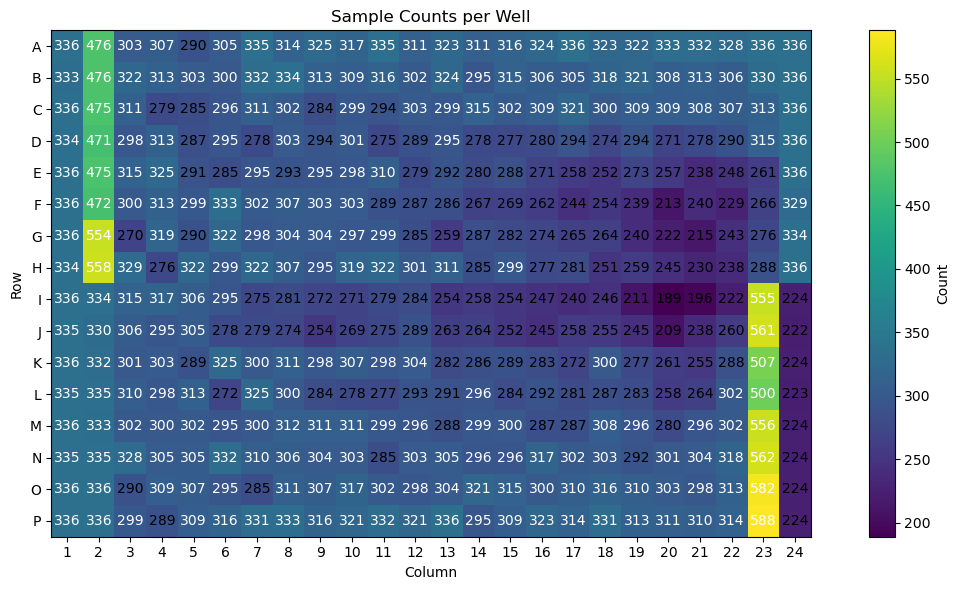

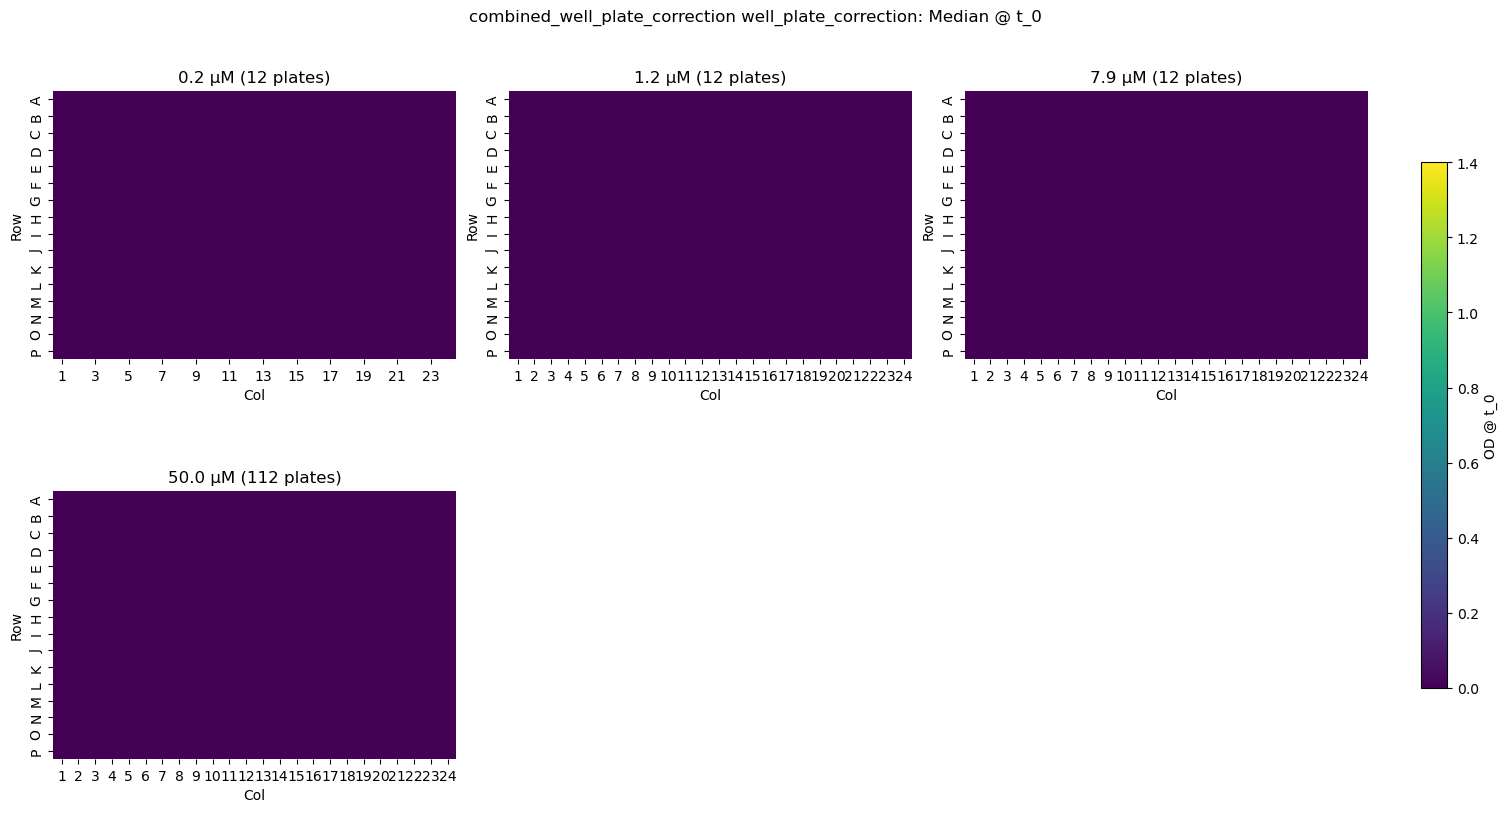

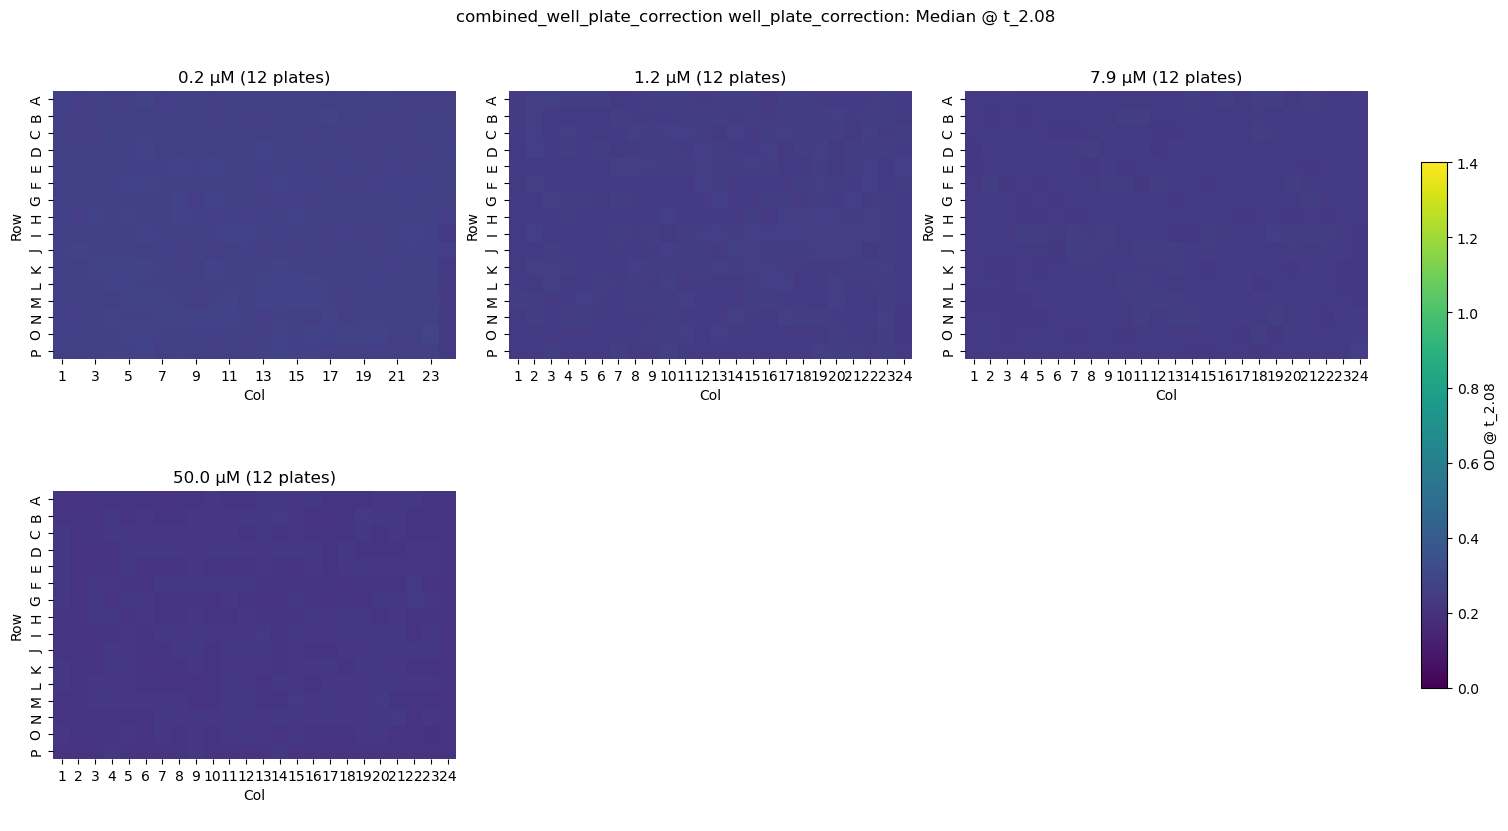

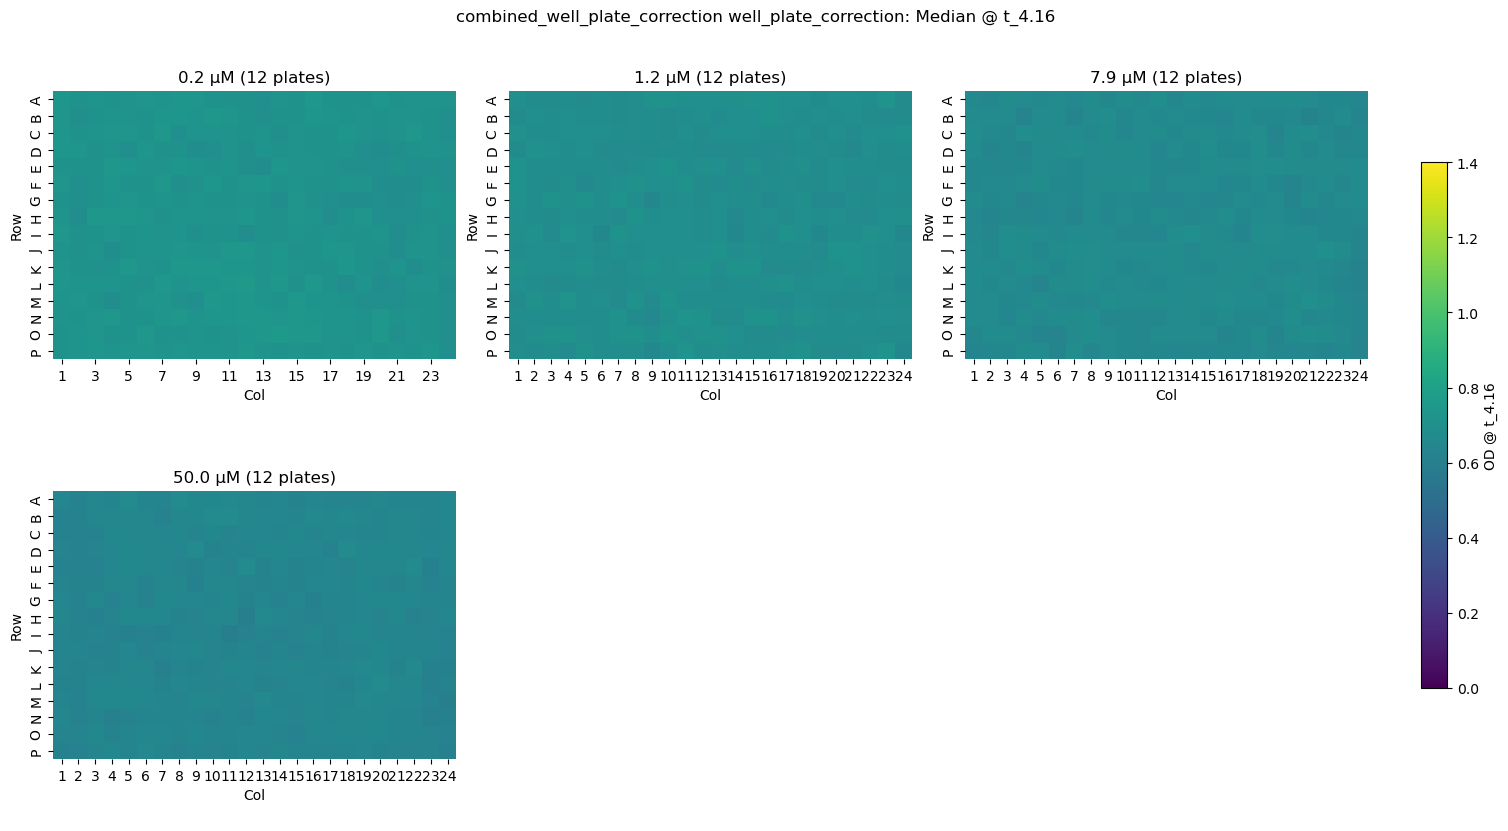

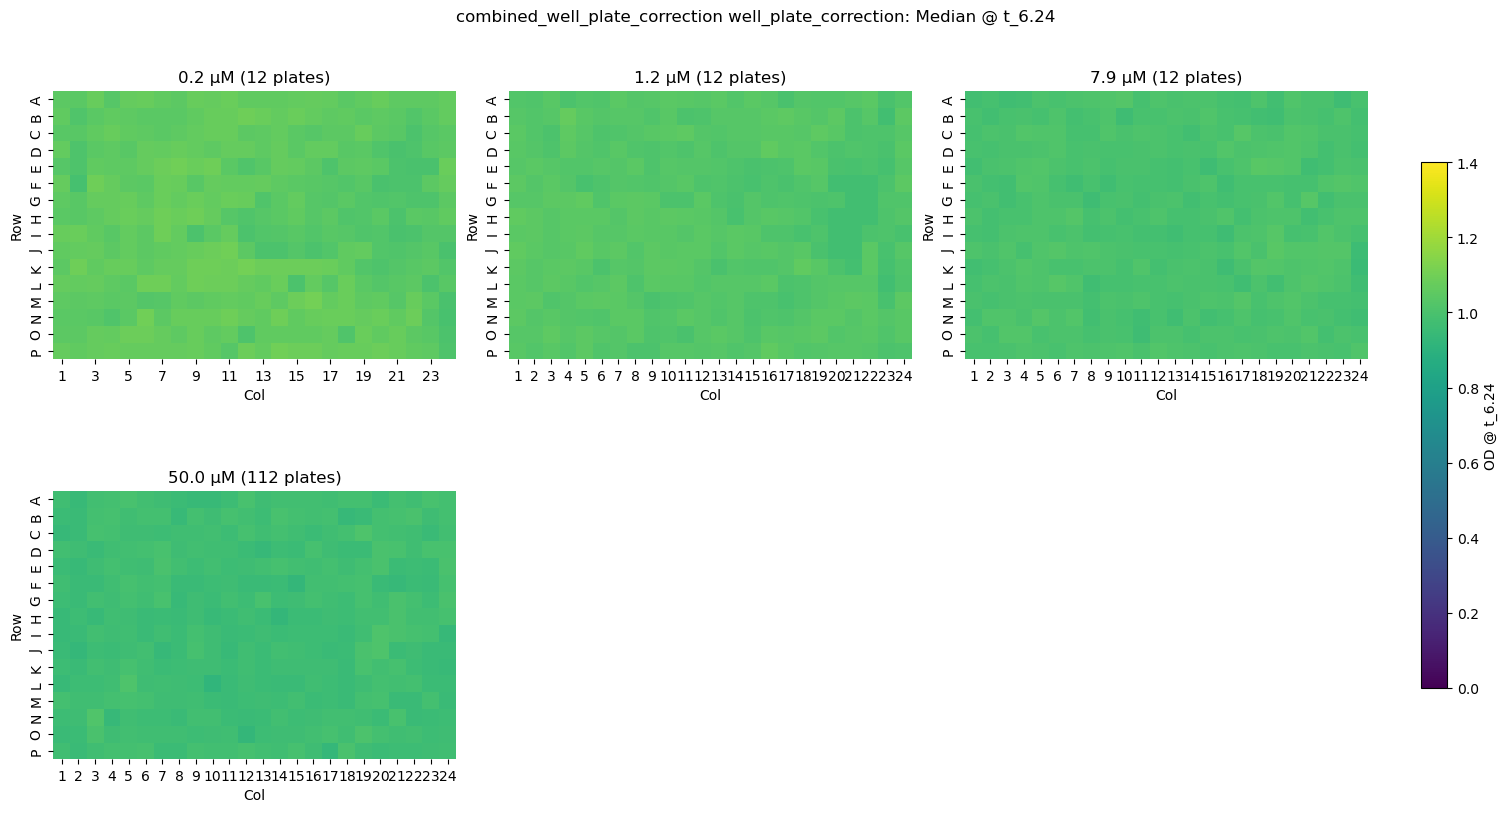

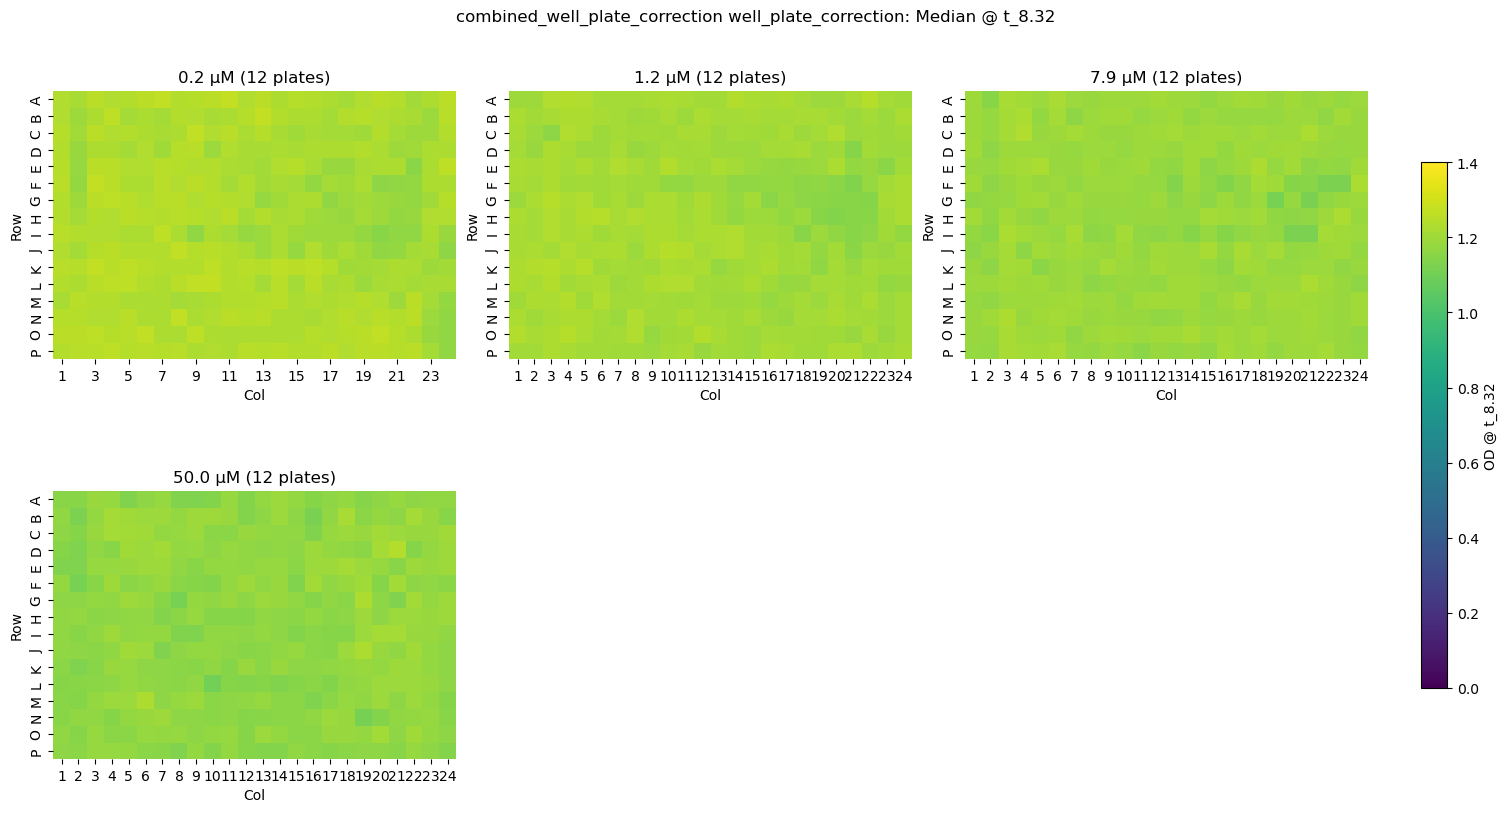

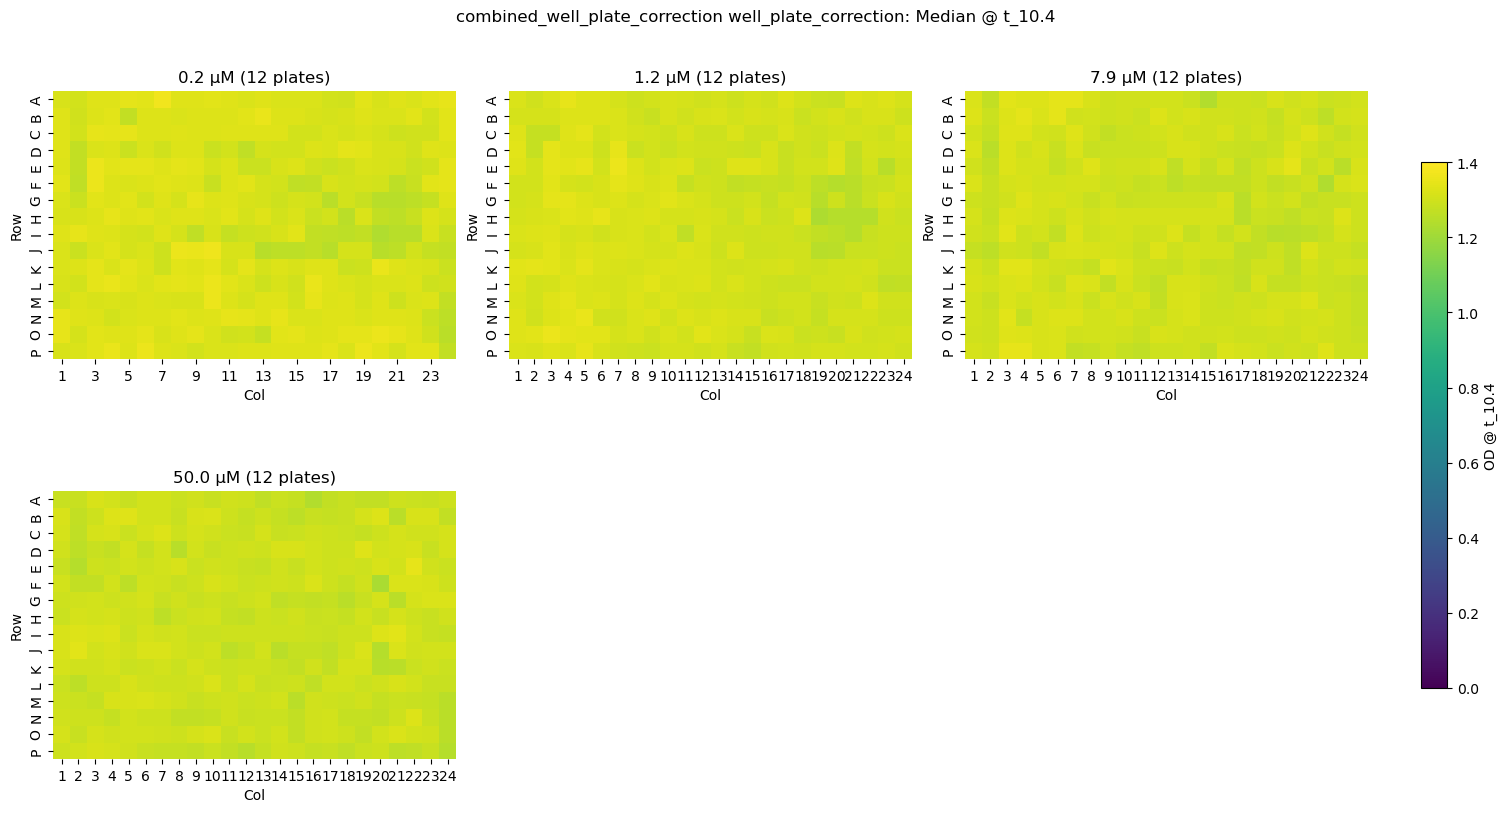

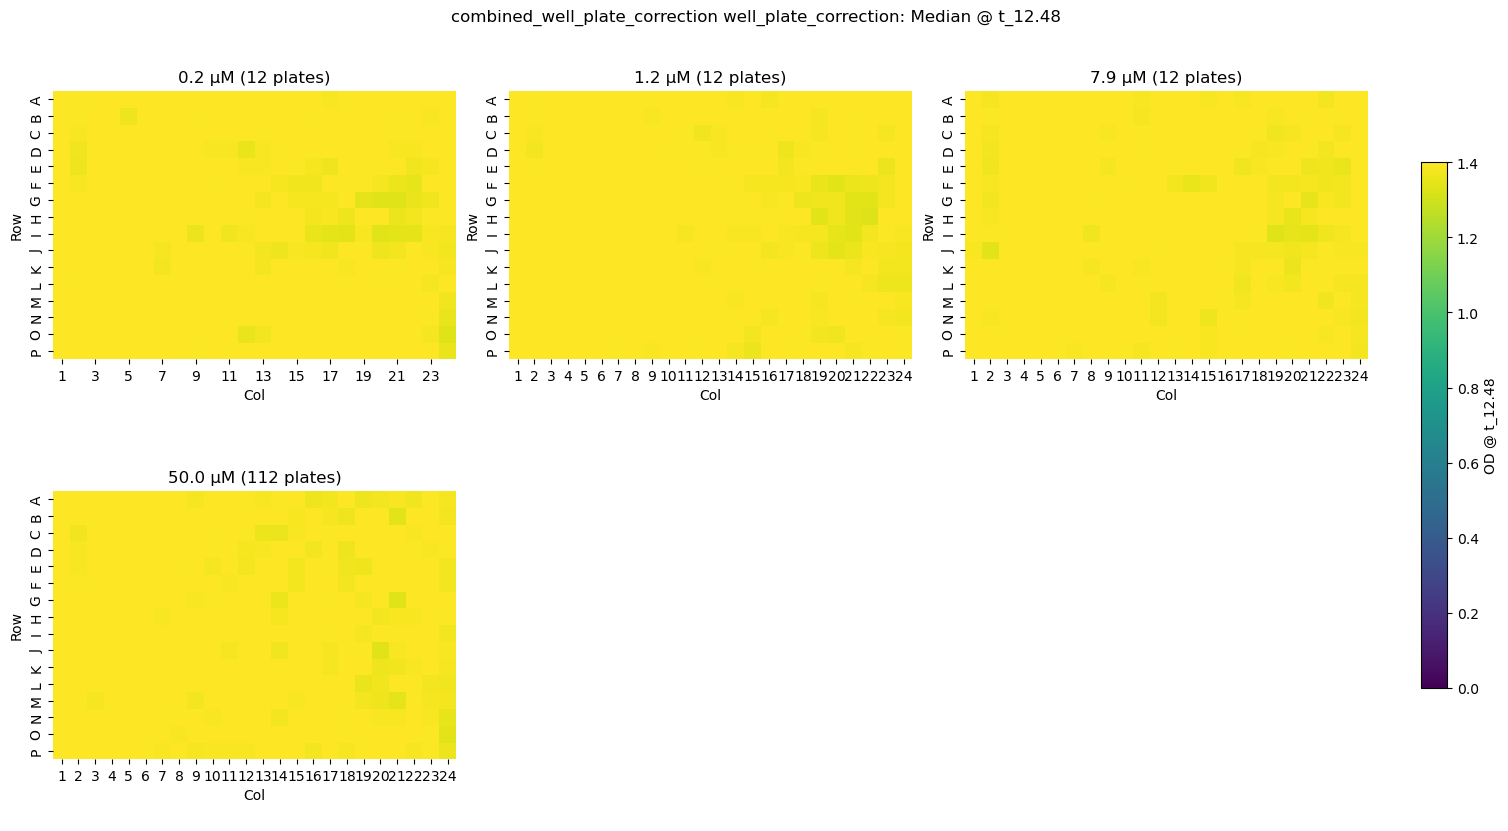

In [74]:
mask_actives_pos_controls = (df_well_plate_correction['is_Active'] == 1) | (df_well_plate_correction['Control_Label'] == 1)

df_well_plate_correction_no_active_pos = df_well_plate_correction.loc[~mask_actives_pos_controls].reset_index(drop=True)

df_well_plate_correction_filled_no_active_pos = augment_specific_columns(df_well_plate_correction_no_active_pos)

plot_sample_counts_per_well(df_well_plate_correction_filled_no_active_pos)

for t in ['t_0','t_2.08','t_4.16','t_6.24','t_8.32','t_10.4','t_12.48']:

    plot_aggregated_heatmaps_long(
        correct_uncorrect='well_plate_correction',
        dataset='combined_well_plate_correction',
        df_long=df_well_plate_correction_filled_no_active_pos,
        timepoint=t,
        vmin=0,
        vmax=1.40,
        save_path=True,
    )


Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']
Timepoints: ['t_0', 't_2.08', 't_4.16', 't_6.24', 't_8.32', 't_10.4', 't_12.48']


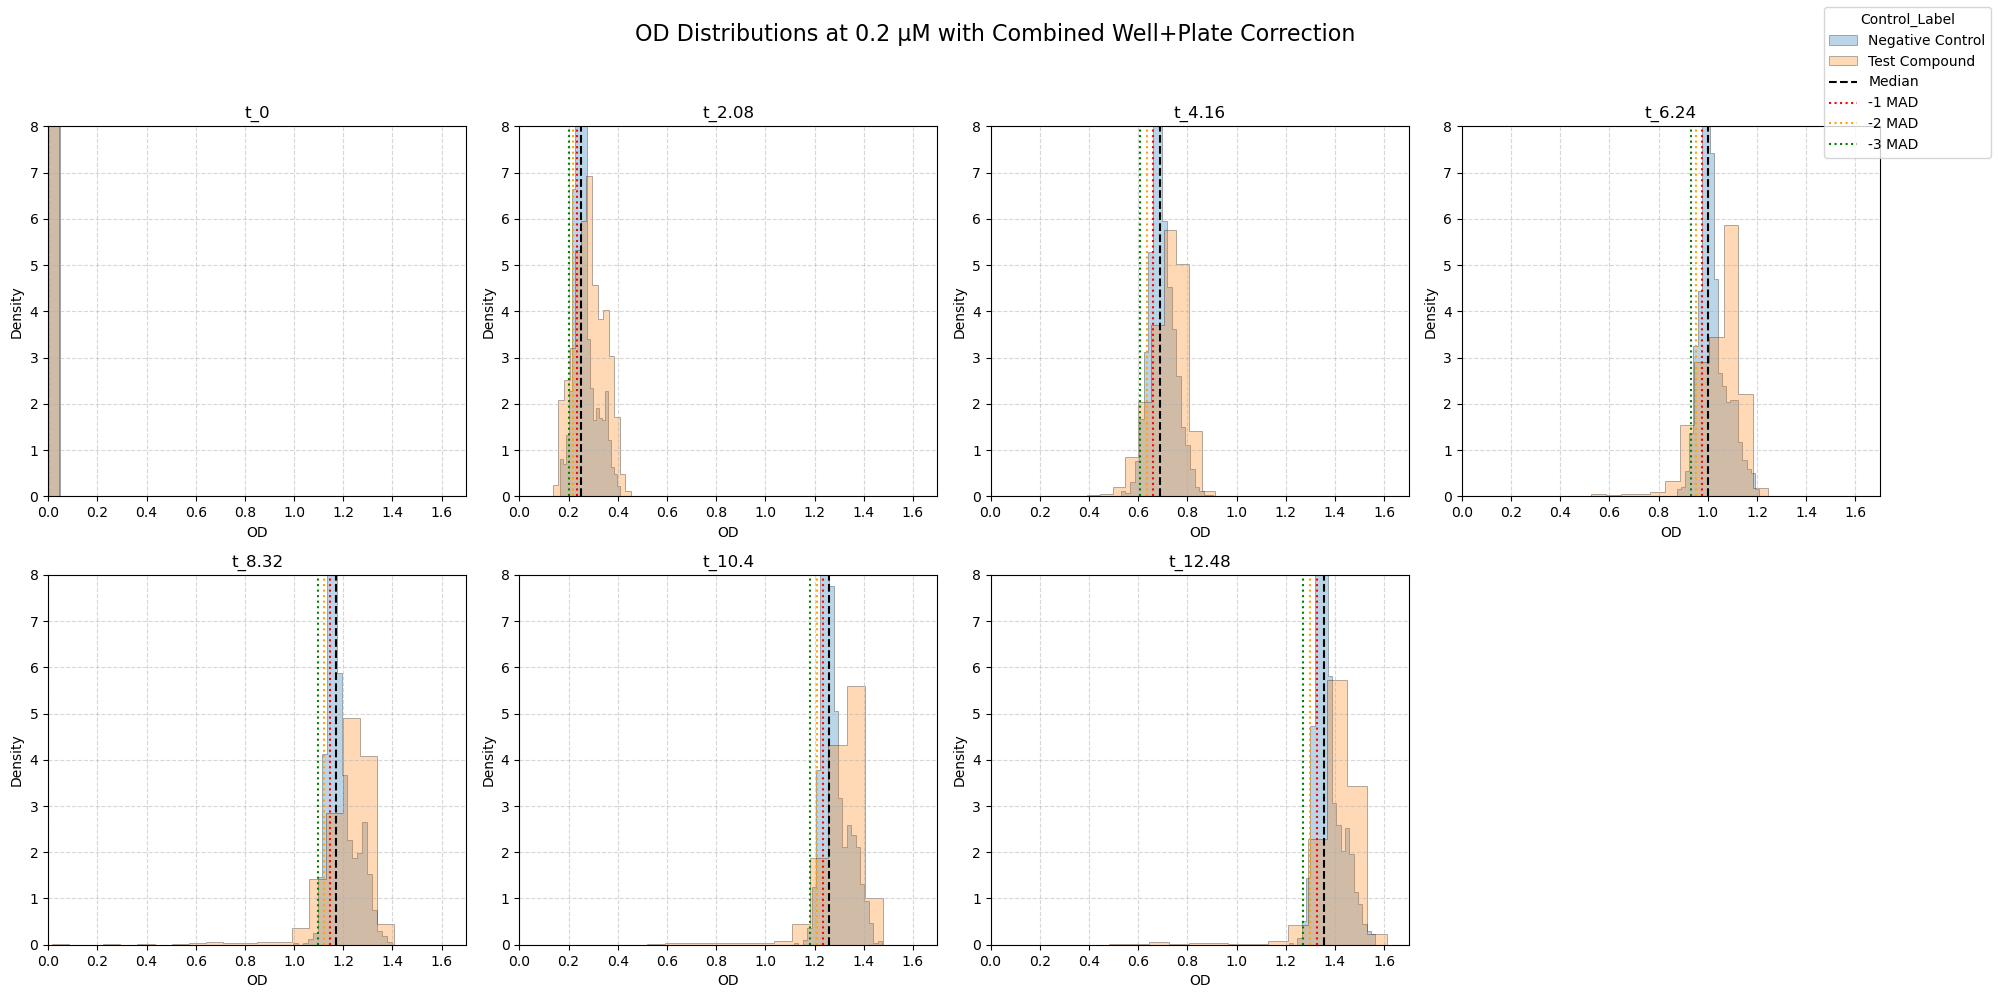

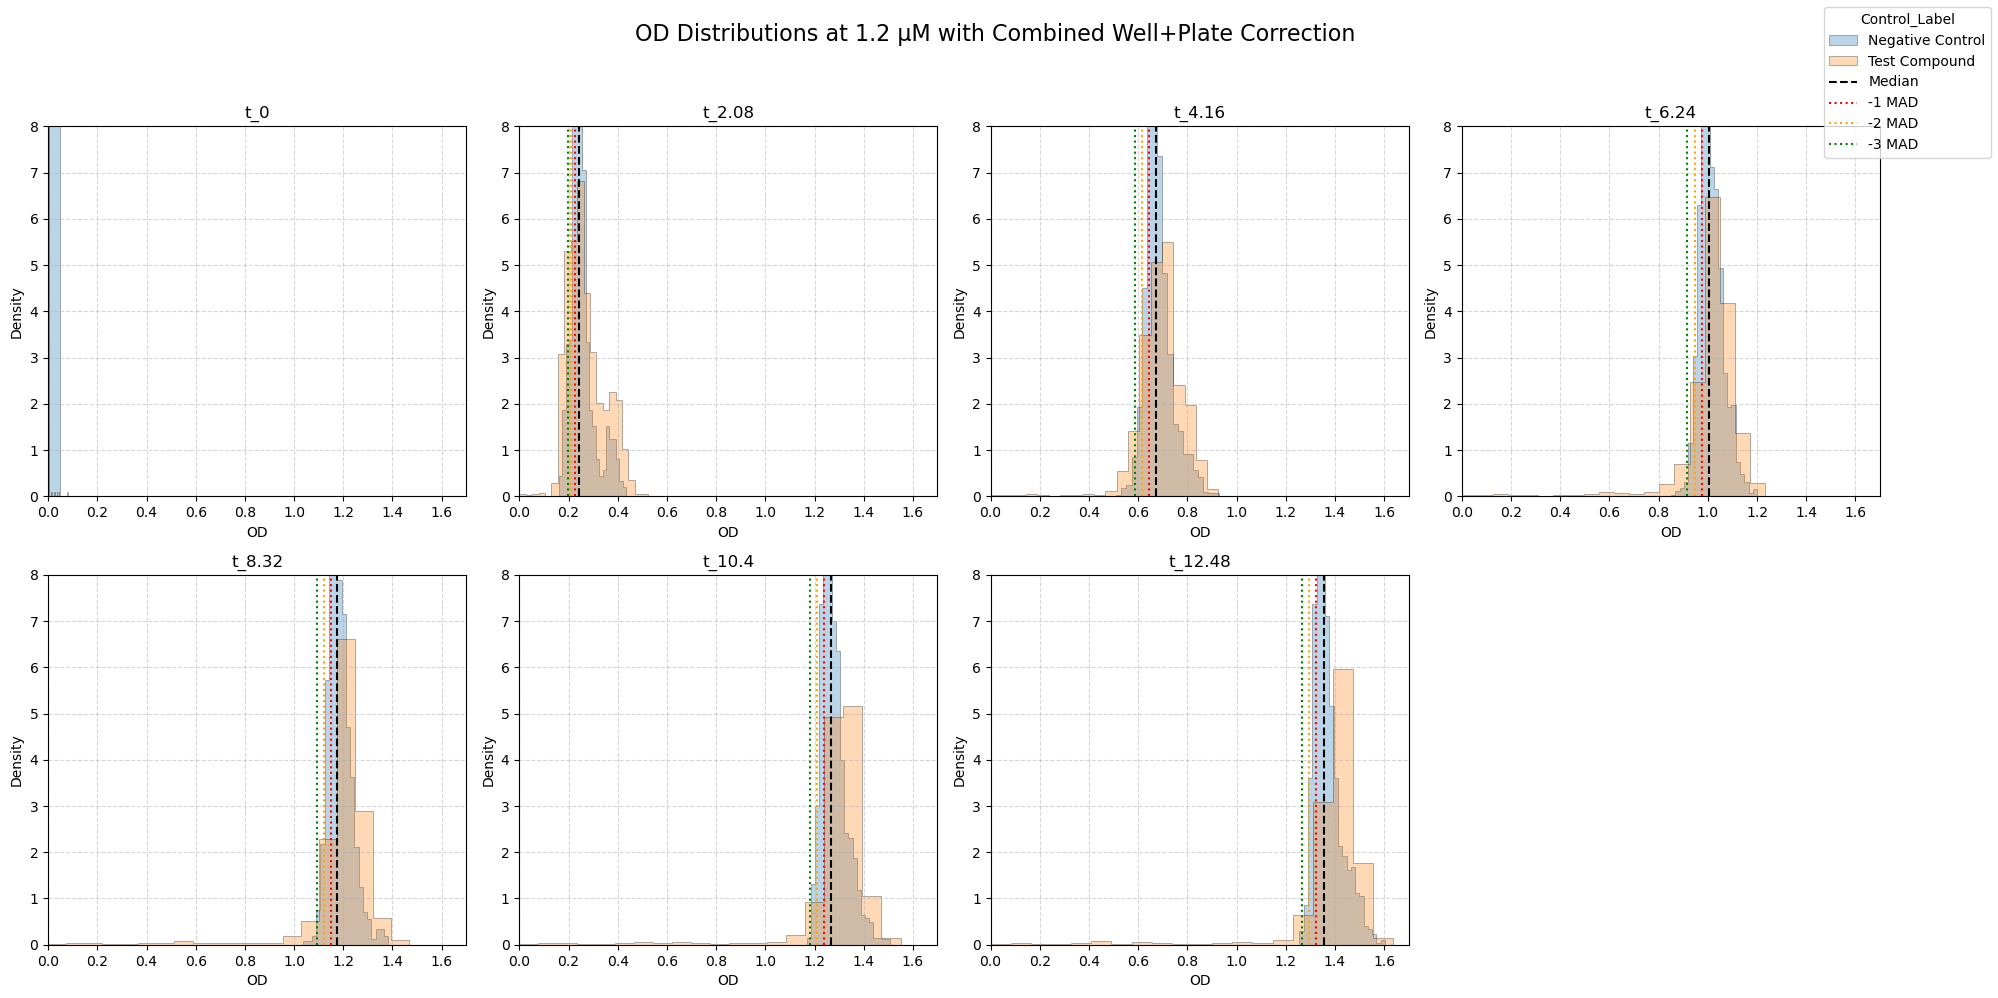

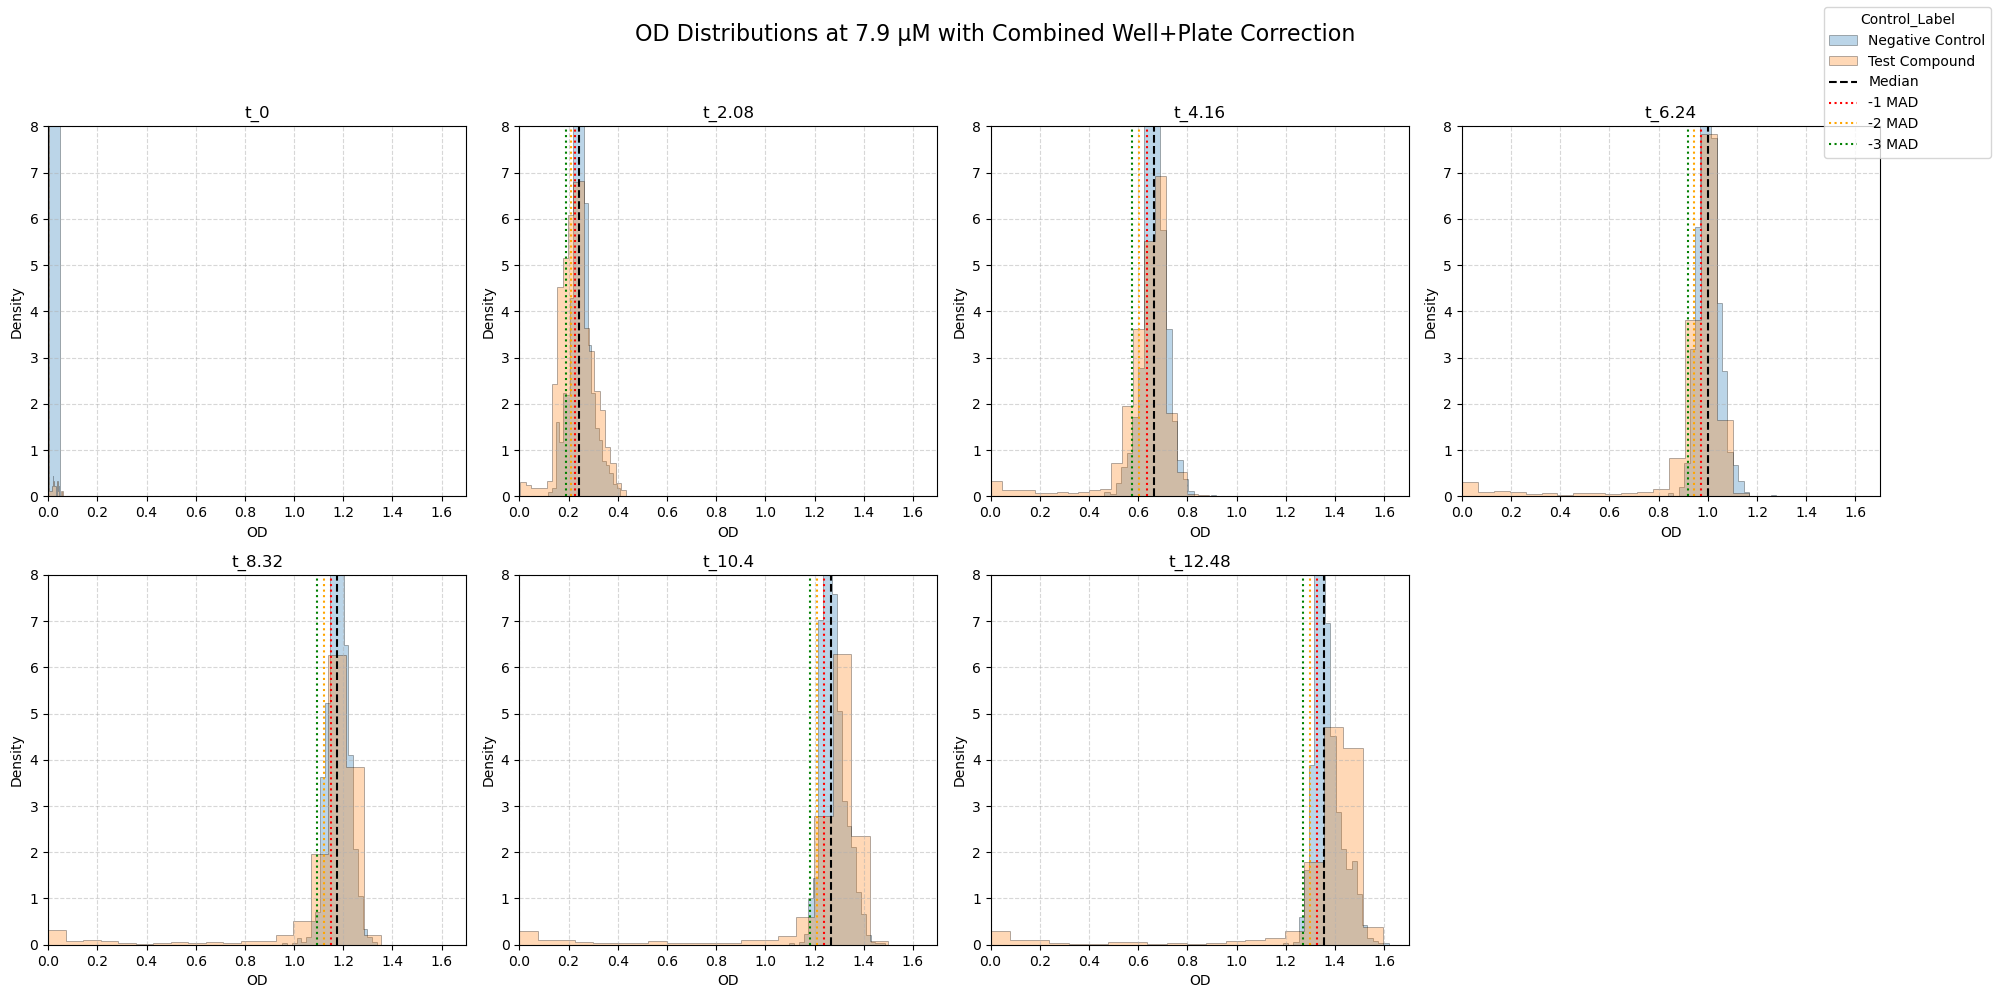

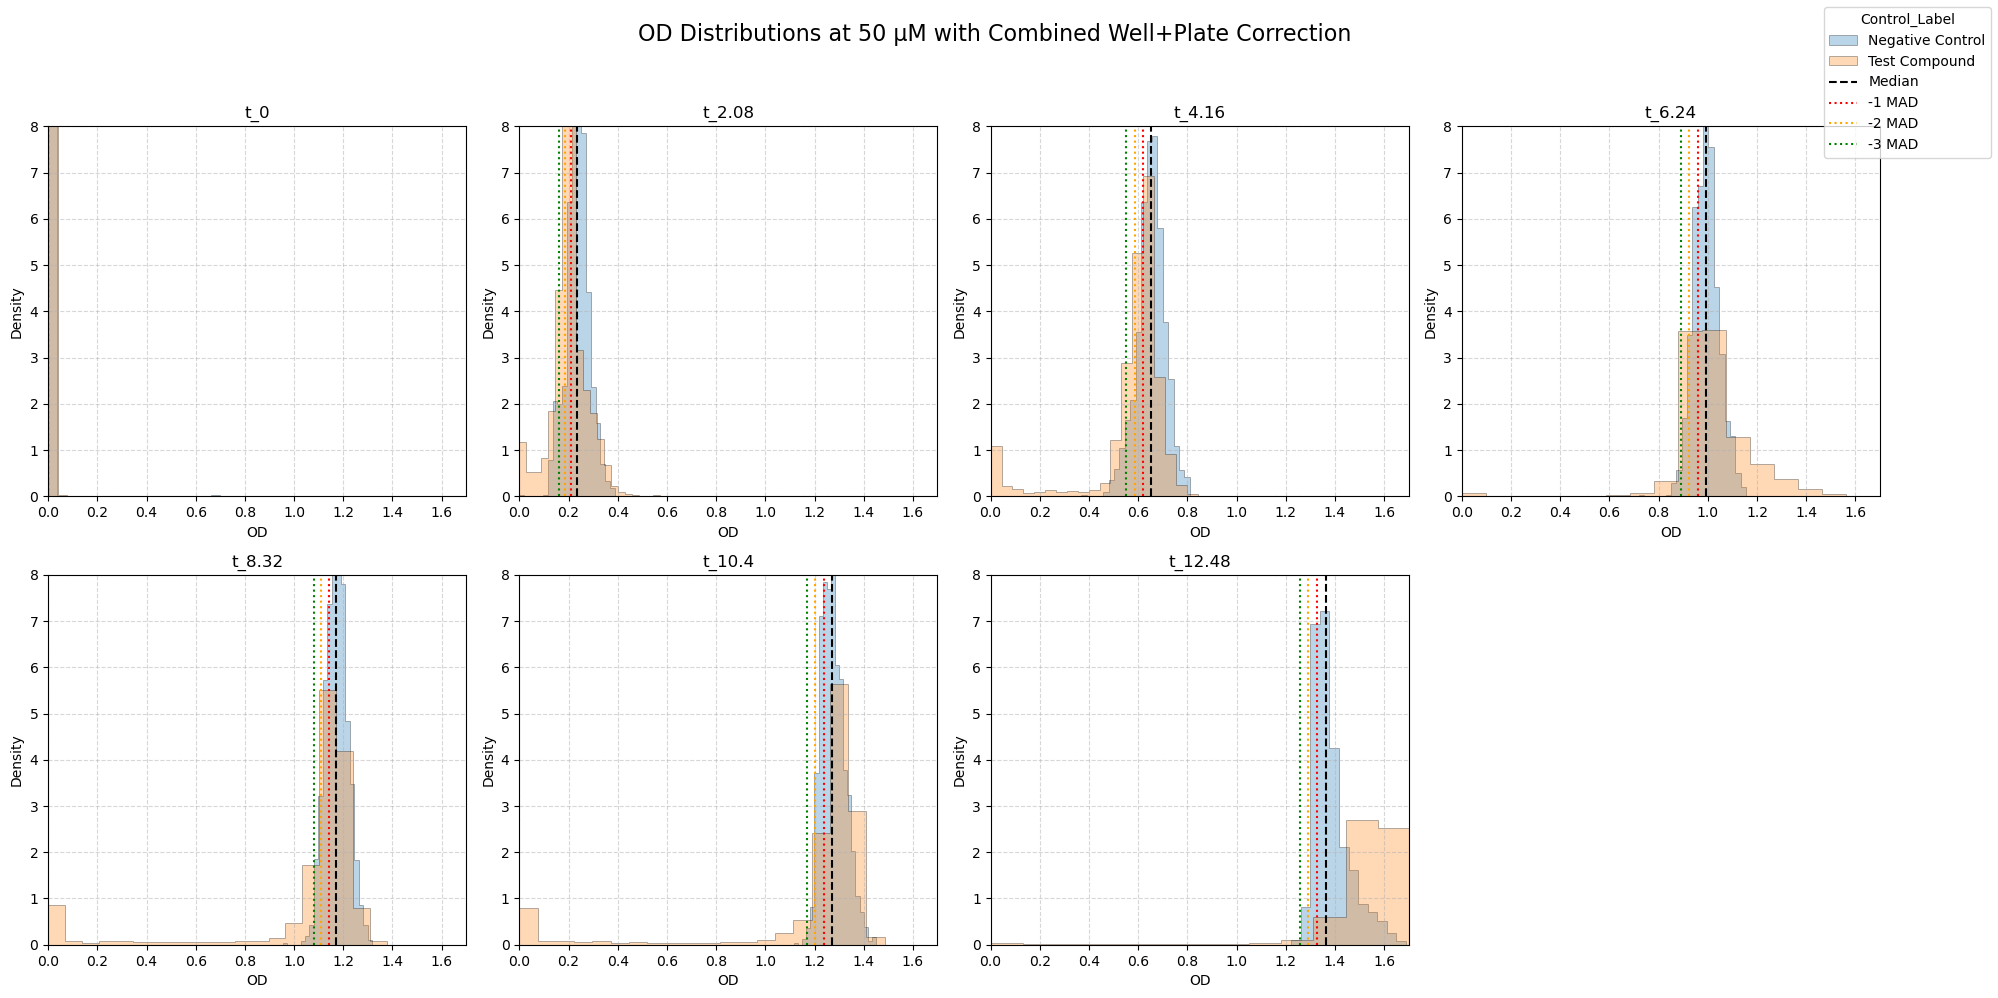

In [75]:
custom_bins = {
    -1: 20,                       # negatives
     0: 20,  # tests
     1: 20,                     # positives
}

title='Combined Well+Plate Correction'
concentrations=[0.2,1.2,7.9,50]
for c in concentrations:
    plot_hist_od_distributions_long(
        title,
        correct_uncorrect='well_plate_correction',
        dataset='combined_well_plate_correction',
        df_long=df_well_plate_correction,
        concentration=c,
        bins=custom_bins, 
        max_x=1.7,
        max_density=8,
        plot_pos_ctrls=False,
        save_path=True)